In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.ar_model import AR
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
UScases= pd.read_excel('CoronaUSCasesTransposed.xlsx')
USDeaths= pd.read_excel('CoronaUSDeathsTransposed.xlsx')
pd.set_option('display.max_columns', None)
UScases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Name,Value
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/22/20,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/23/20,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/24/20,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/25/20,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/26/20,0
5,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/27/20,0
6,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/28/20,0
7,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/29/20,0
8,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/30/20,0
9,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/31/20,0


In [4]:
GlobalDeaths= pd.read_excel('CoronaGlobalDeathsTransposed.xlsx')
GlobalCases= pd.read_excel('CoronaGlobalTransposed.xlsx')

In [ ]:
bestMSE=10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
bestP1=0
bestP2=0
bestP3=0
for p1 in range(6):
    for p2 in range(6):
        for p3 in range(6):
            dict_of_sources = dict(iter(UScases.groupby('Province_State')))
            sumMSE= 0
            for x, y in dict_of_sources.items():
                ActualData= y['Value'].values.astype(float)
                singular= sum(ActualData)
                if(singular>2) :
                    NumberOfElements = len(ActualData)
                    TrainingSize = int(NumberOfElements * 0.7)
                    TrainingData = ActualData[0:TrainingSize]
                    TestData = ActualData[TrainingSize:NumberOfElements]
                    #model = ARIMA(TestData, order=(1, 1, 0))
                    model = SARIMAX(ActualData, trend='c', order=(p1,p2,p3), enforce_stationarity=False, enforce_invertibility=False)
                    model_fit = model.fit()
                    prediction = model_fit.forecast(len(TestData))
                    #plt.figure(figsize=(10,5))
                    #plt.plot(TestData,prediction, color='red')
                    MSEArima= (sum(prediction[0]-TestData)**2)/len(TestData)
                    sumMSE= sumMSE+MSEArima
                    #print(prediction)
                    print(MSEArima,x)
            print("SUM of MSE",sumMSE,"P1 value:",p1,"P2 value",p2,"P3 value",p3)
            if(sumMSE<bestMSE):
                sumMSE= bestMSE
                bestP1=p1
                bestP2=p2
                bestP3=p3
            

In [ ]:
print(bestP1,bestP2,bestP3)

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[  107.83906995   113.65759123   116.74242241 ... 46254.48006684
 46306.15014506 46357.85680057]
203565.8936802105


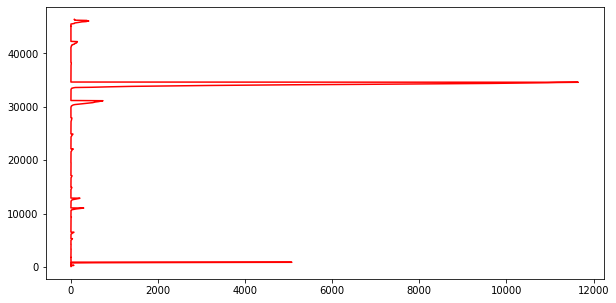

In [15]:
dict_of_sources = dict(iter(UScases.groupby('Province_State')))
michiganData=UScases.loc[UScases['Province_State'] == 'Michigan']
ActualData= michiganData['Value'].values.astype(float)

NumberOfElements = len(ActualData)
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]
#model = ARIMA(TestData, order=(1, 1, 0))
model = SARIMAX(ActualData, trend='c', order=(5,3,2), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
prediction = model_fit.forecast(len(TestData))
plt.figure(figsize=(10,5))
plt.plot(TestData,prediction, color='red')
MSEArima= (sum(prediction[0]-TestData)**2)/len(TestData)

print(prediction)
print(MSEArima)

In [ ]:
print(sumMSE)

In [5]:
import csv 
with open('USPredictionsV6.csv', 'w', newline='') as file:
    dict_of_sources = dict(iter(UScases.groupby('Combined_Key')))
    sumMSE= 0
    for x, y in dict_of_sources.items():
        ActualData= y['Value'].values.astype(float)
        Lat= y['Lat'].values.astype(float)
        Long= y['Long_'].values.astype(float)
        singular= sum(ActualData)
        if(singular>2) :
            NumberOfElements = len(ActualData)
            TrainingSize = int(NumberOfElements * 0.7)
            TrainingData = ActualData[0:TrainingSize]
            TestData = ActualData[TrainingSize:NumberOfElements]
            #model = ARIMA(TestData, order=(1, 1, 0))
            model = SARIMAX(ActualData, trend='c', order=(2,2,1), enforce_stationarity=False, enforce_invertibility=False)
            model_fitStates = model.fit()
            predictionStates = model_fitStates.forecast(14)
            #predictionStatesV2 = model_fitStates.predict(len(TestData))
            #plt.figure(figsize=(10,5))
            #plt.plot(TestData,predictionStatesV2, color='red')
            MSEArima= (sum(predictionStates[0]-TestData)**2)/len(TestData)
            
            print(x, predictionStates)
            print(MSEArima,x)
            writer = csv.writer(file,delimiter=',')
            writer.writerow([x,Lat[0],Long[0],predictionStates[13]])

Abbeville, South Carolina, US [ 9.35138395  9.65191246 10.02074618 10.37658331 10.75093626 11.12617286
 11.51000209 11.89845877 12.29337254 12.6938362  13.10027851 13.51249029
 13.93057145 14.35447359]
583.5567728704168 Abbeville, South Carolina, US
Acadia, Louisiana, US [102.93190989 104.40391869 106.5429894  108.2049101  110.10993564
 112.06794278 113.875904   115.89780211 117.81038947 119.78952934
 121.81535951 123.80575001 125.87340172 127.92989141]
83093.56786100456 Acadia, Louisiana, US
Accomack, Virginia, US [16.2808046  17.25174494 17.83042442 18.64498434 19.56637612 20.38783898
 21.2114543  22.09005085 22.97117045 23.84805421 24.74245008 25.65138082
 26.56730691 27.49329105]
2171.934961015598 Accomack, Virginia, US
Ada, Idaho, US [523.1172446  523.33752245 528.21232664 530.18168261 533.6019079
 536.77007228 539.58752696 543.11526739 545.98785656 549.45296199
 552.58654076 555.94398427 559.28647888 562.63048216]
2025459.0253265991 Ada, Idaho, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Adair, Iowa, US [1.02530034 1.05091665 1.07684861 1.10309636 1.12965991 1.15653926
 1.18373439 1.21124533 1.23907205 1.26721458 1.29567289 1.324447
 1.35353691 1.38294261]
0.016002676516720115 Adair, Iowa, US
Adair, Kentucky, US [10.89407428 14.37886164 15.63091996 15.88847132 18.39286196 20.16196407
 20.89180156 22.85596778 24.77842722 25.91226062 27.63390441 29.56245789
 30.98951928 32.64356489]
1889.6731882724541 Adair, Kentucky, US
Adair, Missouri, US [11.00039678 11.00035879 11.00065329 11.00077613 11.00096187 11.00116582
 11.00133584 11.00155051 11.00174374 11.00195591 11.00217026 11.00238807
 11.00261524 11.00284453]
784.1111031794167 Adair, Missouri, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Adair, Oklahoma, US [27.38682173 27.79862493 28.41972184 29.07012897 29.83729501 30.63148625
 31.49398037 32.37992512 33.30868181 34.25776917 35.23619774 36.23266515
 37.25132351 38.28647205]
6325.674441172121 Adair, Oklahoma, US
Adams, Colorado, US [ 774.77614574  848.24986733  911.33748147  998.09238415 1060.58834703
 1144.36708525 1217.11193267 1293.63581987 1375.20393752 1449.55294608
 1533.5796563  1611.40922917 1694.1722326  1776.900017  ]
7220402.842518584 Adams, Colorado, US
Adams, Idaho, US [1.04222098 1.08370079 1.12443748 1.16593816 1.20815099 1.25102491
 1.29456349 1.33876839 1.38363944 1.42917658 1.47537982 1.52224916
 1.5697846  1.61798614]
7.902310782550014 Adams, Idaho, US
Adams, Illinois, US [29.58489495 32.58843892 34.54465743 36.88447299 39.70807297 42.37690838
 44.89380021 47.5402015  50.29414598 53.03310337 55.77578419 58.57485836
 61.41819494 64.28345464]
14143.030700449955 Adams, Illinois, US
Adams, Indiana, US [5.42015025 5.56465981 5.84058242 6.04111898 6.28376

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Allen, Kentucky, US [4.08561336 4.3794329  4.6084957  4.81081763 5.03850835 5.27053215
 5.50024822 5.7339695  5.97167047 6.21194108 6.45512549 6.70145741
 6.95080354 7.20314345]
149.525617932052 Allen, Kentucky, US
Allen, Louisiana, US [ 76.24989456  78.35898896  80.39246683  82.49366993  84.62203977
  86.77062396  88.94564942  91.14646872  93.37252222  95.62401304
  97.90095796 100.20332998 102.53113341 104.88437035]
54218.87697188224 Allen, Louisiana, US
Allen, Ohio, US [40.08558163 43.08409194 46.17913791 49.34846971 52.5642898  55.81890127
 59.11249723 62.44597458 65.81963801 69.23350177 72.68753828 76.18173601
 79.71609374 83.29061225]
20628.975996026267 Allen, Ohio, US
Allendale, South Carolina, US [ 5.58452826  5.97649074  6.4431153   6.89153055  7.35400072  7.81931683
  8.29137301  8.7688164   9.25211699  9.7411115  10.23585667 10.73633278
 11.24254667 11.75449597]
454.65503201928937 Allendale, South Carolina, US
Alpena, Michigan, US [2.02410685 2.03846038 2.03815147 3.08645353

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Antrim, Michigan, US [ 8.07039121  8.34539896  8.69863103  9.05397609  9.40100316  9.74832641
 10.10135231 10.46088401 10.82633577 11.19732393 11.57378713 11.95576511
 12.34328506 12.73635164]
622.6001118845323 Antrim, Michigan, US
Apache, Arizona, US [ 91.54540077  96.02946231 100.44252387 104.92434784 109.47219868
 114.08532334 118.7638455  123.50775449 128.31705076 133.19173434
 138.13180523 143.13726342 148.20810891 153.3443417 ]
85221.37556276601 Apache, Arizona, US
Appanoose, Iowa, US [1.03311139 1.06610251 1.09961602 1.13362055 1.16811706 1.20310552
 1.23858593 1.27455829 1.3110226  1.34797886 1.38542707 1.42336723
 1.46179934 1.5007234 ]
1.864745729426111 Appanoose, Iowa, US
Appling, Georgia, US [11.33441827 12.97963019 13.67603467 15.08459316 16.00458519 17.29628453
 18.34634742 19.5908822  20.72026816 21.95413953 23.13676871 24.3785424
 25.60122511 26.86026087]
1637.9901777524294 Appling, Georgia, US
Appomattox, Virginia, US [ 8.00206009  8.87340524  9.48357547 10.18207239 10

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Avoyelles, Louisiana, US [64.58926014 67.12731865 68.193752   70.4674344  71.85052261 73.98583766
 75.58688711 77.6611226  79.41960922 81.48016152 83.35896922 85.43490392
 87.41127146 89.52041289]
34057.33710505395 Avoyelles, Louisiana, US
Baca, Colorado, US [10.38542866 10.8281954  11.24096622 11.65964224 12.08832529 12.52358992
 12.96540389 13.4140609  13.86953661 14.33180833 14.80088023 15.27675384
 15.75942867 16.24890463]
848.3904775724309 Baca, Colorado, US
Bacon, Georgia, US [14.45410928 15.06071891 15.68047133 16.29772887 16.92079484 17.55380471
 18.19728421 18.85100658 19.51484947 20.18879554 20.87285092 21.56701921
 22.27130098 22.98569607]
2085.79880707895 Bacon, Georgia, US
Baker, Florida, US [17.57375142 17.94001381 18.3455798  18.76032156 19.17584523 19.59769578
 20.02446609 20.45624098 20.89310087 21.3350089  21.78197245 22.23399169
 22.69106598 23.15319554]
1621.5727977641777 Baker, Florida, US
Baker, Georgia, US [17.05686748 18.32644821 19.56869592 20.83668221 22.11872

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bandera, Texas, US [1.81920043 1.91731132 1.70656922 1.77772512 1.62544054 1.62012365
 1.54113338 1.47109558 1.43668914 1.33831455 1.31210096 1.21639444
 1.17574989 1.09608948]
50.353246345057876 Bandera, Texas, US
Banks, Georgia, US [ 7.26679972  7.54193541  7.84537751  8.15459419  8.47103625  8.79273543
  9.11979255  9.45203533  9.78947027 10.13208225 10.47987166 10.83283715
 11.19097874 11.55429632]
582.4498885385409 Banks, Georgia, US
Bannock, Idaho, US [5.06395111 5.09468302 5.12809115 5.16912561 5.2062634  5.24441329
 5.28381513 5.32312583 5.363001   5.40342417 5.44424179 5.48553967
 5.52731015 5.56953606]
65.93043028138548 Bannock, Idaho, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Barber, Kansas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Barber, Kansas, US
Barbour, Alabama, US [11.04838052 12.06968606 13.01501434 13.98746473 14.97843442 15.97971688
 16.99312308 18.01916411 19.05761226 20.1084502  21.17170065 22.24736229
 23.33543326 24.43591389]
1957.345945173805 Barbour, Alabama, US
Barbour, West Virginia, US [4.17393634 4.36596549 4.54244844 4.71851402 4.89936751 5.08370829
 5.27082103 5.46079435 5.65371873 5.84959175 6.04840274 6.25015104
 6.45483784 6.66246331]
181.43232453852784 Barbour, West Virginia, US
Barnes, North Dakota, US [2.06876638 2.13860245 2.2095074  2.28148165 2.3545252  2.42863806
 2.50382023 2.5800717  2.65739248 2.73578256 2.81524195 2.89577064
 2.97736864 3.06003594]
12.558744440386704 Barnes, North Dakota, US
Barnstable, Massachusetts, US [516.51899931 529.1510959  542.4564937  555.8206514  569.36920881

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Barnwell, South Carolina, US [5.31239911 5.60989795 5.89164603 6.17975094 6.47290553 6.76970075
 7.07031166 7.37482239 7.68321596 7.99548774 8.31163918 8.63167048
 8.95558154 9.28337235]
301.43888897899166 Barnwell, South Carolina, US
Barren, Kentucky, US [3.65479021 4.01294042 4.8058473  4.88925948 4.84890616 5.10709126
 5.40032318 5.57584472 5.74974943 5.97593135 6.20411878 6.41590768
 6.6327438  6.8606315 ]
192.4865179944304 Barren, Kentucky, US
Barron, Wisconsin, US [6.2278009  6.45289326 6.71627782 6.98212498 7.25764769 7.537252
 7.82218596 8.11157261 8.40562523 8.70420582 9.00735046 9.31503739
 9.62727264 9.94405278]
472.5843167392265 Barron, Wisconsin, US
Barrow, Georgia, US [ 58.35646257  61.4500886   64.62412738  67.83495575  71.08767548
  74.38167673  77.71703196  81.09373255  84.51177953  87.97117278
  91.4719123   95.0139981   98.59743018 102.22220854]
34663.85362124837 Barrow, Georgia, US
Barry, Michigan, US [11.76361662 13.5642189  15.24725097 16.71549786 18.46653791 20.0

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bay, Florida, US [39.03356471 40.06464799 41.10698326 42.15487015 43.21065    44.27335995
 45.3433959  46.42059507 47.5050244  48.59665636 49.69550226 50.80155745
 51.91482386 53.03530068]
14200.970166670575 Bay, Florida, US
Bay, Michigan, US [ 63.39800865  65.56169805  70.31204151  74.45420665  77.39292273
  81.98643218  86.07038077  89.5372831   94.05480605  98.18616326
 102.02666422 106.5319928  110.76495453 114.88355224]
47171.5148871992 Bay, Michigan, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bayfield, Wisconsin, US [3.11623029 3.22404777 3.32464509 3.42836623 3.53420364 3.6413786
 3.75004391 3.86025143 3.9719838  4.08523821 4.20001634 4.3163183
 4.43414392 4.55349322]
19.19448813208546 Bayfield, Wisconsin, US
Beadle, South Dakota, US [20.85374638 20.7556677  20.68107886 20.58280699 20.48405354 20.39037465
 20.29323224 20.19395817 20.09453917 19.99391451 19.89187878 19.78880568
 19.68462613 19.57925685]
291.3416093571285 Beadle, South Dakota, US
Beaufort, North Carolina, US [14.75553895 15.45290479 16.16683766 16.89427328 17.63136597 18.37795903
 19.13422544 19.90018647 20.67583545 21.46117083 22.2561928  23.06090147
 23.87529681 24.69937885]
1778.9579347729998 Beaufort, North Carolina, US
Beaufort, South Carolina, US [198.19246223 199.026902   201.65202839 204.08259944 205.79396288
 208.57679126 210.52896462 212.95980266 215.35409381 217.59117793
 220.11669087 222.45154856 224.9286285  227.41434707]
234219.51860103395 Beaufort, South Carolina, US
Beauregard, Louisiana, US 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Beaver, Oklahoma, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Beaver, Oklahoma, US
Beaver, Pennsylvania, US [160.03562545 167.7504925  175.55907436 183.55186834 191.66813883
 199.90599218 208.25640625 216.7169369  225.285722   233.96196751
 242.74521923 251.63525558 260.63195903 269.73526998]
236174.74016314195 Beaver, Pennsylvania, US
Beaverhead, Montana, US [1.04042237 1.08152518 1.12330789 1.16577079 1.20891387 1.25273713
 1.29724058 1.34242422 1.38828804 1.43483204 1.48205623 1.52996061
 1.57854517 1.62780992]
10.253520214826054 Beaverhead, Montana, US
Becker, Minnesota, US [ 3.77788408  4.0162979   5.62914239  6.05690618  7.54781206  8.12706683
  9.52928869 10.23082426 11.57001972 12.37129897 13.66726418 14.55089858
 15.81890726 16.77148068]
327.22713128650975 Becker, Minnesota, US
Beckham, Oklahoma, US [1.03883189 1.07713188 1.11489456 1.15332108

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Benton, Indiana, US [2.11262191 2.20750144 2.3079341  2.40935811 2.51267038 2.61769453
 2.72446524 2.8329757  2.94322725 3.05521962 3.16895286 3.28442697
 3.40164194 3.52059778]
91.45306398889299 Benton, Indiana, US
Benton, Iowa, US [21.01363112 22.55816601 23.98536093 25.46681154 26.95715159 28.46837563
 29.99731239 31.54480032 33.11061775 34.69482328 36.29740142 37.91835626
 39.55768673 41.2153931 ]
4715.315591011953 Benton, Iowa, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Benton, Minnesota, US [1.02320065 1.04666647 1.07039746 1.09439365 1.11865504 1.14318163
 1.16797343 1.19303043 1.21835264 1.24394004 1.26979265 1.29591046
 1.32229348 1.3489417 ]
0.013456756297475756 Benton, Minnesota, US
Benton, Mississippi, US [5.00729061 5.01283013 5.01887203 5.02488155 5.03098519 5.03715304
 5.04339216 5.0497009  5.05607963 5.06252827 5.06904684 5.07563533
 5.08229375 5.08902209]
78.08290206419461 Benton, Mississippi, US
Benton, Missouri, US [3.09370021 3.21906743 3.33920504 3.45345419 3.56827217 3.68585577
 3.80574464 3.92739355 4.05071029 4.17576375 4.30259275 4.43119735
 4.56157053 4.69371003]
39.29410526346421 Benton, Missouri, US
Benton, Oregon, US [23.89309301 25.14522472 25.40057781 26.59280091 27.40889904 28.04925089
 29.17778433 29.88933088 30.77856472 31.77478513 32.55407897 33.53959224
 34.46256757 35.34536188]
3010.219253363358 Benton, Oregon, US
Benton, Tennessee, US [4.07542642 4.18561093 4.31213618 4.44696473 4.58659169 4.72948873
 4.8749894  5.0228

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bethel, Alaska, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Bethel, Alaska, US
Bexar, Texas, US [ 820.17267144  876.61788434  927.92451799  979.92944329 1036.31749263
 1089.99319155 1144.78879929 1201.99741429 1257.95395405 1315.03990742
 1373.56858924 1431.69489544 1490.84015701 1550.96588776]
7069554.352203561 Bexar, Texas, US
Bibb, Alabama, US [18.29160007 19.94447569 21.6062167  23.23384707 24.87862599 26.55194579
 28.24681853 29.96082482 31.6948385  33.44931782 35.2241677  37.01930772
 38.83474548 40.67049423]
4686.497810672485 Bibb, Alabama, US
Bibb, Georgia, US [ 77.22309171  82.11403922  87.10505348  92.29858195  97.50558431
 102.73437364 108.05440412 113.44523507 118.88567828 124.38874384
 129.95920866 135.59096076 141.28371479 147.03985428]
61660.566955329814 Bibb, Georgia, US
Bienville, Louisiana, US [40.21993455 43.80865564 47.43316044 51.0

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Big Horn, Montana, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Big Horn, Montana, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Big Stone, Minnesota, US [1.03074961 1.06194775 1.09359212 1.12568418 1.15822395 1.19121143
 1.22464661 1.25852949 1.29286007 1.32763836 1.36286435 1.39853805
 1.43465945 1.47122855]
0.5681361364347066 Big Stone, Minnesota, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bingham, Idaho, US [2.04857948 2.1101497  2.17178768 2.23308587 2.2949814  2.35774438
 2.42136776 2.48582804 2.55111981 2.6172436  2.68419998 2.75198906
 2.82061081 2.89006522]
1.544793899324646 Bingham, Idaho, US
Black Hawk, Iowa, US [ 65.48573072  75.80222367  88.84032119  91.74693339 105.91477467
 115.46384305 120.30996989 136.47347049 142.50489668 151.18786339
 166.82538922 170.82806381 183.87252282 196.7874218 ]
66063.72875911399 Black Hawk, Iowa, US
Blackford, Indiana, US [5.12184906 5.27150062 5.4543878  5.65215766 5.86206694 6.07973216
 6.30366029 6.53262772 6.7660669  7.00360448 7.24504406 7.49026684
 7.73920704 7.99182616]
296.15812397971195 Blackford, Indiana, US
Bladen, North Carolina, US [2.08740826 2.17632277 2.26676233 2.35872028 2.45219662 2.54719135
 2.64370448 2.741736   2.84128591 2.94235421 3.04494091 3.149046
 3.25466947 3.36181135]
61.41921598830984 Bladen, North Carolina, US
Blaine, Idaho, US [456.28362224 458.83180117 460.18772883 461.85681681 464.05617743
 465.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bleckley, Georgia, US [3.13445708 3.27125201 3.41042067 3.55194756 3.6958327  3.84207607
 3.99067769 4.14163754 4.29495563 4.45063197 4.60866654 4.76905935
 4.9318104  5.09691969]
155.55790254972985 Bleckley, Georgia, US
Bledsoe, Tennessee, US [ 7.50124827  7.96465362  8.27576876  8.61853442  8.96267668  9.31317726
  9.6692164  10.030929   10.39829285 10.77131162 11.14998469 11.53431217
 11.92429405 12.31993032]
778.7583068203186 Bledsoe, Tennessee, US
Blount, Alabama, US [14.72633344 15.30718105 15.90271199 16.5608051  17.25630917 17.95968093
 18.66257757 19.36991084 20.08712396 20.81566412 21.55457613 22.30285822
 23.06026063 23.82696841]
1749.8883799514472 Blount, Alabama, US
Blount, Tennessee, US [47.58762281 49.19628595 50.8260287  52.47682685 54.14868038 55.8415893
 57.55555362 59.29057332 61.04664842 62.8237789  64.62196478 66.44120604
 68.2815027  70.14285475]
14674.442674711316 Blount, Tennessee, US
Blue Earth, Minnesota, US [22.00002846 22.00002568 22.00003205 22.00004227 22.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Bowman, North Dakota, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Bowman, North Dakota, US
Box Butte, Nebraska, US [2.02410685 2.03846038 2.03815147 3.08645353 3.11536352 3.11445403
 4.1870373  4.23071284 4.22890702 5.32585534 5.38451181 5.38150983
 6.50290477 6.57676395]
90.64057256139454 Box Butte, Nebraska, US
Box Elder, Utah, US [13.45162387 13.95090358 14.46046497 14.97823721 15.50414418 16.03818489
 16.58035945 17.13066787 17.68911016 18.2556863  18.8303963  19.41324017
 20.0042179  20.60332948]
1092.8392557340235 Box Elder, Utah, US
Boyd, Kentucky, US [26.05006731 29.64697874 31.8375618  33.25636805 35.58418474 37.89340243
 39.90159597 42.08573757 44.3634838  46.58156623 48.83414667 51.14310874
 53.46277777 55.80305762]
8584.08485882807 Boyd, Kentucky, US
Boyle, Kentucky, US [13.34613241 14.90084662 15.83700018 16.66010877 17.76119759 18.8014543

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Burke, North Dakota, US [2.08234313 2.16335603 2.24302687 2.3241613  2.40666755 2.49045457
 2.57552842 2.66189197 2.7495449  2.83848715 2.92871871 3.02023959
 3.1130498  3.20714933]
27.161979839040576 Burke, North Dakota, US
Burleigh, North Dakota, US [52.61885322 54.41972217 56.28451763 58.18618213 60.11866101 62.0806045
 64.0717119  66.09191619 68.14120247 70.2195674  72.32701025 74.46353086
 76.62912917 78.8238052 ]
11213.59559653382 Burleigh, North Dakota, US
Burleson, Texas, US [6.1304326  6.16791189 6.19458766 6.28762395 6.34078148 6.38386721
 6.46029585 6.52034049 6.57348627 6.64329296 6.70687039 6.76639635
 6.83430271 6.90024151]
410.1501052557175 Burleson, Texas, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Burlington, New Jersey, US [1215.43245687 1275.16989758 1335.40961511 1395.95732884 1457.14980608
 1518.96936899 1581.51521872 1644.7940499  1708.83652556 1773.64837394
 1839.23951609 1905.61287733 1972.77179748 2040.71756131]
16284148.765908176 Burlington, New Jersey, US
Burnet, Texas, US [ 6.36605282  6.69873221  6.92643458  7.18059727  7.46962708  7.75186457
  8.02907785  8.31400537  8.60476046  8.89758942  9.19347186  9.4934694
  9.79716662 10.10427781]
269.95357760916124 Burnet, Texas, US
Burt, Nebraska, US [1.04508406 1.09096096 1.13763003 1.18509162 1.23334573 1.28239237
 1.33223153 1.38286321 1.43428742 1.48650415 1.5395134  1.59331518
 1.64790947 1.7032963 ]
17.854176896977414 Burt, Nebraska, US
Butler, Alabama, US [ 9.35579926 10.57453324 11.87775748 13.16551088 14.48289285 15.8095559
 17.15468019 18.51412393 19.88975577 21.28073262 22.68743486 24.10969087
 25.54757809 27.00106157]
1442.404161719759 Butler, Alabama, US
Butler, Iowa, US [1.03411763 1.06805732 1.10254592 1.1375

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Calhoun, Illinois, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Calhoun, Illinois, US
Calhoun, Michigan, US [ 88.33504327  94.86299261 101.17267347 107.63850022 114.16325141
 120.77203348 127.45837218 134.22393642 141.06829604 147.99156191
 154.99370545 162.07473402 169.23464574 176.47344108]
87187.45339691384 Calhoun, Michigan, US
Calhoun, Mississippi, US [ 29.93920679  36.07680862  42.19699686  48.46205019  54.74969219
  61.15205373  67.59971747  74.14498691  80.74845322  87.43980956
  94.19668318 101.03593116 107.94485228 114.93301646]
14231.54371645072 Calhoun, Mississippi, US
Calhoun, South Carolina, US [6.23665984 6.47325991 6.70875002 6.94818115 7.19149065 7.43857218
 7.68942887 7.94406292 8.20247422 8.46466274 8.73062848 9.00037143
 9.27389159 9.55118898]
236.64589490620563 Calhoun, South Carolina, US
Calhoun, Texas, US [15.75691588 16.40120326 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Callahan, Texas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Callahan, Texas, US
Callaway, Missouri, US [19.41963372 19.20263427 18.74687507 18.43596157 18.02549692 17.67118741
 17.27383189 16.89663183 16.49932131 16.10755392 15.70498564 15.30202932
 14.89205089 14.47927695]
1391.1533806141006 Callaway, Missouri, US
Calloway, Kentucky, US [14.71308705 21.68478813 19.99547042 21.9921591  29.61910664 25.87989033
 29.98895271 37.64712835 31.67176373 38.86351803 45.5445761  37.46640806
 48.75931125 53.01773177]
2805.337331972568 Calloway, Kentucky, US
Calumet, Wisconsin, US [5.34747279 5.4098286  5.56303408 5.78846917 6.00982086 6.21990413
 6.43265233 6.65145134 6.87405164 7.09947041 7.32800893 7.55990255
 7.79512563 8.03362843]
217.18989660297723 Calumet, Wisconsin, US
Calvert, Maryland, US [100.70180628 107.67377075 114.73181243 121.8770297  129.11043186

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Campbell, Wyoming, US [11.33960943 11.72476302 12.15913933 12.6101618  13.07442795 13.54788271
 14.02966925 14.51923205 15.01640987 15.52112147 16.03333925 16.55305084
 17.08025171 17.61493992]
1056.1230693544305 Campbell, Wyoming, US
Canadian, Oklahoma, US [59.40663333 61.90997095 64.61860063 67.36312094 70.16461303 73.00086087
 75.87548888 78.78554583 81.73161674 84.71330502 87.73070161 90.78375266
 93.87247197 96.99685218]
29871.30348751113 Canadian, Oklahoma, US
Candler, Georgia, US [4.13511607 4.26221329 4.42673588 4.58866953 4.7626767  4.93742125
 5.1175135  5.29970696 5.48542692 5.6737356  5.86506859 6.05915319
 6.25612145 6.45589364]
165.7805688376564 Candler, Georgia, US
Cannon, Tennessee, US [ 7.27215381  7.56365199  7.84430873  8.12775379  8.41655166  8.71001847
  9.00796212  9.31041349  9.61738584  9.92887805 10.24488924 10.56541943
 10.89046869 11.22003701]
329.8135326254575 Cannon, Tennessee, US
Canyon, Idaho, US [165.70507754 172.12349185 178.86872771 187.87504924 196.34

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Caribou, Idaho, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Caribou, Idaho, US
Carlton, Minnesota, US [29.26080536 31.63817531 34.4272174  37.53852071 40.29261544 43.34998156
 46.32320309 49.35250966 52.43642716 55.52973743 58.67490783 61.84753661
 65.05616843 68.30097764]
12792.52088167376 Carlton, Minnesota, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Caroline, Maryland, US [23.26303371 25.38077236 27.51571926 29.67750056 31.8664457  34.0825516
 36.32581681 38.5962412  40.89382476 43.21856751 45.57046943 47.94953053
 50.3557508  52.78913025]
7658.904730460786 Caroline, Maryland, US
Caroline, Virginia, US [ 6.74894462  7.12516934  7.33640932  7.82289786  8.25878023  8.59597011
  9.01770298  9.45387737  9.85103492 10.27059958 10.70725629 11.13380394
 11.5667139  12.01082661]
662.7907686530582 Caroline, Virginia, US
Carroll, Arkansas, US [2.09175899 2.17771116 2.2656417  2.35500469 2.44583761 2.53813791
 2.63190576 2.72714116 2.82384409 2.92201456 3.02165257 3.12275812
 3.2253312  3.32937183]
49.82658615369064 Carroll, Arkansas, US
Carroll, Georgia, US [222.55764465 229.189944   236.55340556 244.58891578 252.47716805
 260.30093141 268.30781671 276.45267865 284.66226743 292.95634627
 301.3560804  309.85367544 318.44317966 327.12747867]
309122.90440607094 Carroll, Georgia, US
Carroll, Illinois, US [5.1369265  5.31587808 5.50882672 5.7079

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Carroll, Iowa, US [1.02056125 1.04132423 1.06228864 1.08345464 1.10482223 1.12639141
 1.14816218 1.17013454 1.19230848 1.21468402 1.23726114 1.26003986
 1.28302016 1.30620206]
0.010569120402988892 Carroll, Iowa, US
Carroll, Kentucky, US [1.99999852 2.00004197 2.0000699  2.00013853 2.00020433 2.00029624
 2.00039812 2.00051661 2.00065114 2.00079909 2.0009642  2.00114286
 2.00133794 2.0015475 ]
15.999940937009983 Carroll, Kentucky, US
Carroll, Maryland, US [263.45844016 277.3388275  291.37570042 305.59724129 320.00288845
 334.59231214 349.36557357 364.32266784 379.46359483 394.78835462
 410.29694721 425.98937259 441.86563076 457.92572173]
659493.7425722361 Carroll, Maryland, US
Carroll, Mississippi, US [ 8.50479523  8.68459774  9.00866028  9.44541172  9.84855941 10.22130972
 10.60897364 11.0125872  11.41820701 11.82488977 12.23689829 12.65471441
 13.07704355 13.50367905]
714.1709018014053 Carroll, Mississippi, US
Carroll, New Hampshire, US [30.4799598  28.92121383 31.8531584  30.97681722 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cass, Nebraska, US [3.10357205 3.20093044 3.30026726 3.40101299 3.503207   3.60684655
 3.71193184 3.81846286 3.92643961 4.03586209 4.1467303  4.25904423
 4.3728039  4.48800929]
26.19249341382247 Cass, Nebraska, US
Cass, North Dakota, US [123.60827958 133.110751   142.60322903 151.57213921 160.94874999
 170.56502984 180.12979626 189.82157059 199.68203063 209.62640368
 219.67193022 229.84435433 240.12697842 250.51647587]
166497.7823919745 Cass, North Dakota, US
Cass, Texas, US [5.11653983 5.34615915 5.54950043 5.74639422 5.95153391 6.16039069
 6.37175466 6.58636144 6.80426017 7.02535188 7.24964418 7.47714842
 7.70786206 7.94178403]
168.55047689185812 Cass, Texas, US
Cassia, Idaho, US [ 8.79265777  9.24560559  9.77952215 10.44282339 11.08894279 11.70020984
 12.3276848  12.9778041  13.63278106 14.2902755  14.95648285 15.63225252
 16.31542671 17.00569758]
909.8239932187332 Cassia, Idaho, US
Castro, Texas, US [10.94830329 10.9545719  10.92360422 10.90153942 10.88971647 10.86061494
 10.844683

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Caswell, North Carolina, US [3.15897486 3.29943766 3.4232791  3.55463547 3.69001911 3.8265798
 3.96517795 4.10609015 4.24916119 4.39437382 4.54175166 4.69129394
 4.8429975  4.99686288]
95.93956285534603 Caswell, North Carolina, US
Catahoula, Louisiana, US [22.54592271 22.64736083 23.68969753 24.49870067 24.95898393 26.128677
 26.56738758 27.55176211 28.33183507 29.02133615 30.0254256  30.67268378
 31.62506939 32.43643645]
5765.3062128986585 Catahoula, Louisiana, US
Catawba, North Carolina, US [37.64223457 38.47790384 40.54899644 42.75358164 44.09590689 46.16884046
 48.20992251 49.86157054 51.93319649 53.94129287 55.78901225 57.87488297
 59.90956491 61.89066751]
10735.275140545837 Catawba, North Carolina, US
Catoosa, Georgia, US [13.91680598 14.75903166 15.63536293 16.52840015 17.42975204 18.34246133
 19.2669175  20.20275236 21.14998233 22.10864232 23.07872533 24.0602289
 25.0531541  26.05750103]
2114.5310064014 Catoosa, Georgia, US
Catron, New Mexico, US [1.04042237 1.08152518 1.123307

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Charlottesville, Virginia, US [34.46567003 36.04850956 37.6365825  39.2479889  40.87983651 42.53258637
 44.20616503 45.90058419 47.61584197 49.3519387  51.1088743  52.8866488
 54.68526218 56.50471445]
8231.633521812708 Charlottesville, Virginia, US
Charlton, Georgia, US [3.11396316 3.22276732 3.33377367 3.44646404 3.56087362 3.677
 3.79484333 3.91440363 4.03568087 4.15867506 4.28338621 4.40981431
 4.53795936 4.66782137]
63.51796427260024 Charlton, Georgia, US
Chatham, Georgia, US [157.34757584 162.60978576 167.9472066  173.38461921 178.8627689
 184.40995515 190.02581679 195.70271782 201.44529119 207.25290502
 213.1246492  219.06123925 225.06250291 231.12834395]
245161.51944292142 Chatham, Georgia, US
Chatham, North Carolina, US [ 54.32737405  65.06434251 105.8393341  115.19880461  81.96404011
  87.68242011 153.94575795 173.08904863 107.4376502   98.39778987
 207.95032871 251.38426205 130.60605739  85.50815508]
30918.60493403865 Chatham, North Carolina, US
Chattahoochee, Georgia, US [3.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cherokee, Alabama, US [ 9.64449544 10.4118016  11.22435039 12.01797232 12.82592729 13.65001896
 14.48364209 15.32843447 16.1851135  17.05316676 17.93261594 18.82354808
 19.7259333  20.63976462]
913.398127823331 Cherokee, Alabama, US
Cherokee, Georgia, US [209.11954116 217.54450073 227.63321573 238.37788034 248.40140769
 258.6685171  269.35490932 279.99570049 290.70566635 301.62877328
 312.66031661 323.78347277 335.04779589 346.44027268]
343627.75027254934 Cherokee, Georgia, US
Cherokee, Kansas, US [6.2266433  6.45606027 6.68564209 6.91888778 7.15582359 7.39639487
 7.64060144 7.88844416 8.13992302 8.39503802 8.65378915 8.91617641
 9.1821998  9.45185933]
188.60123531768892 Cherokee, Kansas, US
Cherokee, North Carolina, US [11.36839924 11.74243691 12.12212042 12.50744846 12.89842104 13.29503815
 13.69729979 14.10520598 14.51875669 14.93795194 15.36279173 15.79327605
 16.22940491 16.6711783 ]
304.2232316977969 Cherokee, North Carolina, US
Cherokee, Oklahoma, US [21.49418964 21.84443831 22.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Chicot, Arkansas, US [5.20575762 5.38897262 5.61076414 5.82771954 6.05489554 6.28360089
 6.51729043 6.75416823 6.99500186 7.23941339 7.48757067 7.73939337
 7.99491792 8.25412712]
296.83113984650186 Chicot, Arkansas, US
Chilton, Alabama, US [34.74653175 36.97687968 39.07045983 41.2492285  43.43380239 45.65257317
 47.89538648 50.16587404 52.46273698 54.78643982 57.13681644 59.51392625
 61.91774799 64.34828928]
11997.403332019057 Chilton, Alabama, US
Chippewa, Michigan, US [-0.01855064 -0.0344463  -0.05126126 -0.06837143 -0.08588563 -0.10378488
 -0.1220725  -0.1407479  -0.15981118 -0.17926234 -0.19910136 -0.21932826
 -0.23994303 -0.26094567]
12.199324926153892 Chippewa, Michigan, US
Chippewa, Wisconsin, US [21.34168727 21.92420227 22.96002189 23.75197221 24.70086074 25.57626372
 26.51065144 27.42786692 28.3716927  29.31695827 30.27813411 31.24690116
 32.22804204 33.21880723]
3470.203874094214 Chippewa, Wisconsin, US
Chisago, Minnesota, US [ 7.169975    7.63094094  7.97289676  8.25656651  

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Choctaw, Oklahoma, US [2.07915912 2.15474121 2.23189212 2.31023565 2.38979866 2.47057924
 2.5525775  2.63579345 2.72022709 2.80587841 2.89274742 2.98083411
 3.07013849 3.16066056]
22.99965544564715 Choctaw, Oklahoma, US
Chowan, North Carolina, US [3.11869184 3.23208845 3.36410617 3.49631801 3.63313603 3.77176838
 3.91299127 4.05637502 4.20205236 4.34995635 4.50010927 4.65250061
 4.80713404 4.96400792]
112.22137821393986 Chowan, North Carolina, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Christian, Illinois, US [24.60973595 25.52787532 26.51634801 27.50352443 28.48977577 29.48593662
 30.49725119 31.52467316 32.56788906 33.62660374 34.70071945 35.79023227
 36.89515482 38.01549387]
3800.5597172605653 Christian, Illinois, US
Christian, Kentucky, US [ 63.30285608  71.59782538  77.03271872  80.55177504  86.07682787
  91.84859108  96.78290066 102.01201636 107.61294142 113.07099485
 118.53043703 124.16341351 129.84837763 135.55302355]
50316.896398340476 Christian, Kentucky, US
Christian, Missouri, US [17.43423819 17.85534318 18.42680963 18.99395822 19.61770955 20.24437982
 20.89648612 21.55533312 22.22919036 22.91152743 23.60536585 24.30841833
 25.0217843  25.74466076]
1265.3096270307346 Christian, Missouri, US
Cibola, New Mexico, US [26.39381395 27.53745495 28.76622885 29.9972993  31.25024526 32.52039431
 33.80885912 35.11537461 36.44000391 37.782732   39.14356245 40.52249441
 41.91952807 43.33466341]
7050.804676252516 Cibola, New Mexico, US
Citrus, Florida, US [ 77.81999175

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Clay, Arkansas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Clay, Arkansas, US
Clay, Florida, US [214.46442969 226.89372365 218.40063938 270.68107858 294.68013865
 275.10182318 326.02409377 365.8814477  336.22623455 380.06125599
 439.6013013  403.04014195 432.70973195 514.47795045]
592164.3369652807 Clay, Florida, US
Clay, Georgia, US [17.15188962 18.14121275 19.08372834 20.06412063 21.0740965  22.09496295
 23.12504464 24.16783763 25.22431065 26.29392764 27.37639547 28.47177034
 29.5801219  30.70145125]
3336.1538472093694 Clay, Georgia, US
Clay, Indiana, US [13.29570019 14.30991818 15.04472725 15.76356213 16.61061429 17.54560857
 18.48083047 19.38625807 20.28521209 21.20418363 22.14716959 23.10433347
 24.06843972 25.03997215]
2292.350852415124 Clay, Indiana, US
Clay, Iowa, US [1.99999562 1.99998685 1.9999759  1.99996275 1.99994631 1.99992659
 1.9999041

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Clay, Kansas, US [1.03411763 1.06805732 1.10254592 1.13754799 1.17306469 1.20909597
 1.24564184 1.2827023  1.32027734 1.35836697 1.39697119 1.43608999
 1.47572338 1.51587136]
2.46674713219214 Clay, Kansas, US
Clay, Minnesota, US [ 48.94198578  50.60455266  58.40323334  61.23617986  68.29078974
  71.96397346  78.54771653  82.83504596  89.13502567  93.88166216
 100.02601623 105.12591858 111.20240208 116.58294802]
33675.894011501034 Clay, Minnesota, US
Clay, Mississippi, US [21.66305126 23.07251934 24.57998044 26.18214551 27.78753408 29.39222254
 31.01976457 32.67240934 34.34415714 36.03411048 37.74378068 39.47347977
 41.22283153 42.99173528]
5612.295626753928 Clay, Mississippi, US
Clay, Missouri, US [53.77678204 56.56481469 59.42380973 62.31129063 65.23354337 68.19319178
 71.18879376 74.2204997  77.28841735 80.39249889 83.5327471  86.70916622
 89.9217547  93.17051254]
26012.499690794688 Clay, Missouri, US
Clay, Nebraska, US [ 4.04983359  4.07692017  4.07627968  6.17620271  6.23074781  6.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cloud, Kansas, US [3.11687534 3.27078613 3.41402579 3.54857575 3.68474648 3.82522085
 3.96870186 4.11425477 4.26186395 4.41171513 4.56386707 4.71829954
 4.87499452 5.03395073]
112.02903049451312 Cloud, Kansas, US
Coahoma, Mississippi, US [39.17631792 40.34241577 41.66015439 42.98955766 44.35237343 45.73202897
 47.13139608 48.54850591 49.98373274 51.43684193 52.90788176 54.39682419
 55.90367539 57.42843201]
7103.386341809491 Coahoma, Mississippi, US
Cobb, Georgia, US [ 818.99442977  864.26173976  907.80660998  952.52532071  997.60483155
 1043.2750868  1089.47116857 1136.21141216 1183.4906395  1231.31031297
 1279.67001956 1328.56987591 1378.00984909 1427.9899484 ]
5603503.982368347 Cobb, Georgia, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cochise, Arizona, US [17.19275653 18.37704688 19.57991114 20.79758122 22.03057891 23.27883189
 24.54235017 25.82113237 27.11517869 28.42448908 29.74906356 31.08890213
 32.44400479 33.81437154]
3244.872533508707 Cochise, Arizona, US
Cocke, Tennessee, US [ 4.94594387  5.590242    6.00875115  6.51091001  6.99310815  7.49003781
  7.99008287  8.49713279  9.00988525  9.52877631 10.05365996 10.58458509
 11.12153534 11.66451617]
293.42728445588665 Cocke, Tennessee, US
Coconino, Arizona, US [263.03520736 272.98507752 283.02966489 293.22651748 303.58455899
 314.10388964 324.78415196 335.62523773 346.62713098 357.78983175
 369.11334075 380.5976582  392.24278411 404.04871848]
432932.4650314615 Coconino, Arizona, US
Codington, South Dakota, US [12.08240524 12.20277569 12.30461613 12.38234692 12.4585509  12.54582246
 12.63977767 12.7328609  12.82363359 12.91480576 13.00823022 13.10353382
 13.1997268  13.29653142]
876.8720967836815 Codington, South Dakota, US
Coffee, Alabama, US [ 37.9257382   53.407

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Columbia, Washington, US [1.02056125 1.04132423 1.06228864 1.08345464 1.10482223 1.12639141
 1.14816218 1.17013454 1.19230848 1.21468402 1.23726114 1.26003986
 1.28302016 1.30620206]
0.010569120402988892 Columbia, Washington, US
Columbia, Wisconsin, US [25.85272771 26.74548779 27.64532696 28.55794856 29.48236202 30.41873925
 31.36705042 32.32730069 33.29948917 34.28361603 35.27968122 36.28768476
 37.30762665 38.33950688]
3441.4224856346964 Columbia, Wisconsin, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Columbiana, Ohio, US [122.71840521 131.75837984 140.78697632 149.99476254 159.27284992
 168.68346122 178.19104031 187.81590514 197.54644535 207.38929548
 217.34066435 227.40271836 237.57421955 247.85587533]
190612.59719492256 Columbiana, Ohio, US
Columbus, North Carolina, US [ 46.59329136  40.15100207  62.1348861   48.69604177  67.60526266
  71.40957626  59.43683525 102.83328461  54.25324154 116.33083037
  83.15597373  86.20761715 154.00398742  33.84352742]
35935.44153503272 Columbus, North Carolina, US
Colusa, California, US [3.15373952 3.29051514 3.41207495 3.54041364 3.67250025 3.80585845
 3.94119835 4.07875175 4.21839667 4.3601185  4.50393497 4.64984573
 4.79784851 4.94794365]
84.06501546968916 Colusa, California, US
Comal, Texas, US [39.40927924 41.04913036 42.79351581 44.60606411 46.45984068 48.34747432
 50.26319922 52.20552902 54.1732272  56.16599586 58.1835693  60.22588824
 62.2928955  64.38457938]
12644.192023661519 Comal, Texas, US
Comanche, Oklahoma, US [52.65621567 53.74213

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Concho, Texas, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Concho, Texas, US
Concordia, Louisiana, US [20.34966118 21.78005904 23.0976018  24.38368028 25.73409874 27.13049716
 28.52915904 29.93049964 31.353125   32.79999552 34.26372121 35.74180108
 37.23694692 38.7506763 ]
5119.160074078931 Concordia, Louisiana, US
Conecuh, Alabama, US [4.3109453  5.10462355 5.98630323 5.88827276 5.98499876 6.67972052
 7.10688952 7.21926731 7.59251844 8.11411131 8.43701435 8.72093286
 9.15220047 9.58038276]
217.70195423300575 Conecuh, Alabama, US
Contra Costa, California, US [568.41784521 585.09036237 602.86118546 620.58603172 638.86213218
 657.18276141 675.87434667 694.69281144 713.80612371 733.0933073
 752.63932587 772.38367431 792.36911124 812.56529147]
2154111.664215093 Contra Costa, California, US
Converse, Wyoming, US [ 8.14987922  8.93985933  9.72205842 10.314852

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cooke, Texas, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Cooke, Texas, US
Cooper, Missouri, US [4.170772   4.37054728 4.54616898 4.71569363 4.89168881 5.07273939
 5.25630963 5.44227377 5.63108068 5.82282207 6.01742908 6.21487428
 6.41516618 6.61831117]
160.12017342263158 Cooper, Missouri, US
Coos, New Hampshire, US [2.13345792 2.22302001 2.31050604 2.40755365 2.50396528 2.60156133
 2.70121347 2.80235123 2.90504393 3.00935161 3.11524324 3.22272073
 3.33178799 3.44244338]
61.89424571508975 Coos, New Hampshire, US
Coosa, Alabama, US [20.22433441 21.84722424 23.67093158 25.46627052 27.29867948 29.14947331
 31.02398731 32.92069804 34.84004051 36.78189051 38.74628351 40.73320937
 42.74267099 44.77466754]
5464.413599623646 Coosa, Alabama, US
Copiah, Mississippi, US [32.53221797 34.63085156 36.4352372  38.16725248 39.98894866 41.85063978
 43.72209912 45.614234

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Crawford, Michigan, US [10.98964599 12.66846114 15.6797421  17.06443968 17.16206602 18.17855803
 20.34507308 22.12157347 23.0092441  24.01044576 25.70091896 27.48242098
 28.8109432  30.00031018]
1776.4732897817175 Crawford, Michigan, US
Crawford, Missouri, US [4.33128855 4.51374054 4.715574   4.93727264 5.15115587 5.36996046
 5.59230752 5.81675654 6.04419952 6.2744586  6.50747054 6.74329364
 6.98191123 7.22332152]
192.00100524322414 Crawford, Missouri, US
Crawford, Ohio, US [17.72852213 19.40880915 20.74497964 21.91357095 23.33281392 24.72196681
 26.05926223 27.46566906 28.88851004 30.30705764 31.7524304  33.21700246
 34.69244408 36.18595635]
3438.9557826729433 Crawford, Ohio, US
Crawford, Pennsylvania, US [17.51917028 18.55329769 19.64360492 20.88567947 22.07612341 23.26540164
 24.49607456 25.73598121 26.9846874  28.2522223  29.53478585 30.8307939
 32.14203261 33.46828712]
3575.5438449671433 Crawford, Pennsylvania, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Crawford, Wisconsin, US [3.27674489 3.48780128 3.64867233 3.84264042 4.04485409 4.24034998
 4.43921056 4.64271425 4.84797345 5.05538753 5.26559133 5.47832385
 5.69348898 5.91117729]
125.0756931145865 Crawford, Wisconsin, US
Creek, Oklahoma, US [57.5124309  59.33603971 61.34757587 63.47876966 65.69197063 67.96641889
 70.29066786 72.65840612 75.0661537  77.51199178 79.99486241 82.51418221
 85.06962955 87.66102708]
22130.17861599143 Creek, Oklahoma, US
Crenshaw, Alabama, US [3.13653528 3.26083638 3.38873167 3.51857817 3.65054584 3.78461712
 3.92079381 4.05907573 4.19946291 4.34195533 4.486553   4.63325592
 4.78206409 4.93297751]
93.75422248395493 Crenshaw, Alabama, US
Crisp, Georgia, US [ 76.46090778  81.78474997  86.05034729  90.61052819  95.4806935
 100.30531585 105.139493   110.06682413 115.05903307 120.09900962
 125.19697636 130.35569773 135.57204689 140.84582249]
66824.59663815213 Crisp, Georgia, US
Crittenden, Arkansas, US [111.22611431 117.25869239 124.66197038 132.93667921 140.582

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Crosby, Texas, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Crosby, Texas, US
Cross, Arkansas, US [ 7.24668431  7.47421789  7.78158899  8.08919644  8.39503315  8.70691069
  9.02428793  9.34646759  9.67356695 10.00564177 10.3426756  10.68466463
 11.0316108  11.38351428]
521.3651407194761 Cross, Arkansas, US
Crow Wing, Minnesota, US [17.23604918 18.7580999  19.64600281 20.90176974 22.16664751 23.31708033
 24.57423703 25.82912796 27.07540684 28.35836625 29.6485838  30.9497467
 32.27029027 33.60291046]
4042.447671031456 Crow Wing, Minnesota, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Crowley, Colorado, US [2.0801508  2.15566376 2.23283344 2.31118792 2.39076253 2.47155461
 2.55356438 2.6367918  2.72123689 2.80689965 2.89378007 2.98187815
 3.07119389 3.1617273 ]
25.007540728147728 Crowley, Colorado, US
Cullman, Alabama, US [44.41264717 46.86038088 51.02913973 54.30797014 58.15145851 61.74924561
 65.55278757 69.3105754  73.16272631 77.03118013 80.95942467 84.9232326
 88.93610111 92.99051084]
23612.390055303673 Cullman, Alabama, US
Culpeper, Virginia, US [22.20777666 23.54859021 25.36152206 27.10570861 28.75021571 30.60058515
 32.31318785 34.13973241 35.95547731 37.78172174 39.6555232  41.52273666
 43.42854109 45.34679766]
6058.891754799838 Culpeper, Virginia, US
Cumberland, Illinois, US [2.07667986 2.15020947 2.22067579 2.29270401 2.36602636 2.44038979
 2.51582422 2.59234261 2.6699425  2.74862327 2.8283851  2.90922801
 2.99115201 3.07415707]
21.00754935475953 Cumberland, Illinois, US
Cumberland, Kentucky, US [3.28639044 3.53667449 3.79600727 4.05806967 4.32374597 4.59

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dade, Georgia, US [2.09691036 2.18757397 2.27230223 2.3597123  2.44907385 2.5397246
 2.63177988 2.72528575 2.82022877 2.91660618 3.01441934 3.11366837
 3.21435315 3.31647366]
42.04941176898983 Dade, Georgia, US
Dakota, Minnesota, US [ 98.99692723 103.32370308 107.51443158 111.75134327 116.05153172
 120.40609326 124.8144564  129.27704954 133.79388851 138.36495299
 142.99024275 147.66975874 152.40350096 157.19146935]
61993.34903772411 Dakota, Minnesota, US
Dale, Alabama, US [12.1612577  12.79402876 15.65244334 17.28454704 18.10595973 20.0857185
 22.10441936 23.42447389 25.06562445 27.04178522 28.71154858 30.34653823
 32.22767006 34.06295597]
2460.7838584000733 Dale, Alabama, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dallam, Texas, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Dallam, Texas, US
Dallas, Alabama, US [15.94452327 16.39766538 17.71699615 18.45665661 19.57027227 20.45802285
 21.50899813 22.47582112 23.51783658 24.53327309 25.58749101 26.63866487
 27.71362237 28.79518187]
3149.74806562625 Dallas, Alabama, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dallas, Arkansas, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Dallas, Arkansas, US
Dallas, Iowa, US [36.01792319 35.61019074 35.10485622 34.85620148 34.42528803 34.02475071
 33.66796068 33.25116928 32.85527079 32.45781992 32.04235881 31.63241512
 31.21548897 30.79178505]
4210.66225784786 Dallas, Iowa, US
Dallas, Missouri, US [2.25699035 2.45387375 2.60486097 2.78563045 2.97392435 3.15634528
 3.34176394 3.5313332  3.7225527  3.91575265 4.11147586 4.30950565
 4.50976005 4.71231343]
78.94236788581895 Dallas, Missouri, US
Dallas, Texas, US [1883.49962435 1975.09627794 2062.88181231 2154.24204962 2247.07927773
 2340.39247122 2434.91518729 2530.6567073  2627.45638315 2725.35741193
 2824.38225047 2924.51527444 3025.7560415  3128.10804218]
28891679.81844075 Dallas, Texas, US
Dane, Wisconsin, US [348.51164067 357.50321842 366.33927655 375.21386425 384.22532979


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DeKalb, Indiana, US [7.05308123e+02 9.17906733e+03 1.17613575e+05 1.51039887e+06
 1.93880599e+07 2.48888796e+08 3.19500266e+09 4.10145466e+10
 5.26507383e+11 6.75882246e+12 8.67636090e+13 1.11379222e+15
 1.42978504e+16 1.83542786e+17]
12277599.844757056 DeKalb, Indiana, US
DeKalb, Missouri, US [3.12050348 3.27875129 3.42526155 3.56259589 3.7017866  3.84556223
 3.99243823 4.14140927 4.2924865  4.44588199 4.60165609 4.7597826
 4.92024125 5.08303149]
125.49639597948048 DeKalb, Missouri, US
DeKalb,Tennessee,US [10.59156006 11.00462155 11.57328535 12.17010484 12.73012723 13.30040726
 13.88920242 14.48222396 15.08005155 15.68641856 16.30043658 16.92127471
 17.54933514 18.18476268]
1034.1241198490975 DeKalb,Tennessee,US
DeSoto, Mississippi, US [185.09503842 192.28699593 199.57013796 206.9440624  214.40877248
 221.96427056 229.61055679 237.34763117 245.17549369 253.09414436
 261.10358318 269.20381014 277.39482524 285.67662849]
212221.6325947294 DeSoto, Mississippi, US
DeSoto,Florida,US [23.322

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Decatur, Indiana, US [132.88546493 135.92046166 139.50162626 142.85605821 146.4021264
 149.91202215 153.50959278 157.12748017 160.80231483 164.51417584
 168.27389678 172.07558601 175.92244758 179.81273905]
143207.24004776377 Decatur, Indiana, US
Decatur, Tennessee, US [ 3.89263521  4.84373266  5.79771293  6.76295569  7.7406111   8.72957346
  9.73017908 10.74238534 11.76618216 12.80157679 13.84856722 14.90715366
 15.97733619 17.05911476]
291.1519773408956 Decatur, Tennessee, US
Deer Lodge, Montana, US [3.07804788 3.16802474 3.27148877 3.37967159 3.49158554 3.60590442
 3.72231269 3.84058703 3.96065404 4.08247335 4.20602945 4.33131475
 4.45832609 4.58706202]
38.31906353096067 Deer Lodge, Montana, US
Defiance, Ohio, US [12.52634152 12.98666496 13.52910728 14.07959833 14.62744448 15.18404677
 15.74940924 16.32198528 16.90197053 17.48954989 18.08467339 18.68732229
 19.29750575 19.91522514]
1026.0302914830797 Defiance, Ohio, US
Del Norte, California, US [1.9999953  1.9999859  1.99997415 1.999

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dewey, Oklahoma, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Dewey, Oklahoma, US
Diamond Princess, US [50.20084999 51.41570221 52.64520928 53.88924366 55.14780546 56.42089469
 57.70851133 59.01065539 60.32732686 61.65852575 63.00425206 64.36450578
 65.73928692 67.12859548]
36.05101726095091 Diamond Princess, US
Dickens, Texas, US [3.01541459 3.03074464 3.03818863 4.06887644 4.09957743 4.11444528
 5.16038538 5.20649837 5.22877011 6.28994126 6.35150746 6.38116328
 7.45754391 7.5346047 ]
176.28066627440282 Dickens, Texas, US
Dickinson, Iowa, US [1.03411763 1.06805732 1.10254592 1.13754799 1.17306469 1.20909597
 1.24564184 1.2827023  1.32027734 1.35836697 1.39697119 1.43608999
 1.47572338 1.51587136]
2.46674713219214 Dickinson, Iowa, US
Dickinson, Michigan, US [3.26040706 3.41794934 3.51809372 3.68557124 3.85157376 3.99497244
 4.15152369 4.31497636 4.47377

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dodge, Nebraska, US [11.80483894 13.03422177 14.73206765 16.10944632 17.7625532  19.24084429
 20.88479495 22.43710852 24.09222366 25.7032034  27.38108775 29.04196397
 30.74924478 32.45500929]
1570.0768051156838 Dodge, Nebraska, US
Dodge, Wisconsin, US [19.88188622 20.37184662 21.1950405  21.87109686 22.67864539 23.43613741
 24.25040023 25.05270394 25.88393941 26.71805288 27.57067694 28.43192519
 29.30776831 30.19445184]
2421.568110344114 Dodge, Wisconsin, US
Dona Ana, New Mexico, US [52.97518096 55.42896313 58.13820343 60.81253066 63.5485496  66.31168462
 69.11375185 71.95059401 74.82364716 77.73240946 80.67705501 83.65752312
 86.6738349  89.72598299]
22462.786833372345 Dona Ana, New Mexico, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Doniphan, Kansas, US [1.03049251 1.06142621 1.09280071 1.12461619 1.15687265 1.18957009
 1.2227085  1.2562879  1.29030828 1.32476963 1.35967197 1.39501529
 1.43079958 1.46702486]
0.9071849345722339 Doniphan, Kansas, US
Donley, Texas, US [19.05855115 19.81692651 17.18256246 16.75632807 15.61509522 13.74317903
 13.5371098  11.29599753 10.80980071  9.20907754  7.86457193  6.98086146
  5.12852772  4.35654874]
4289.301053028338 Donley, Texas, US
Dooly, Georgia, US [ 58.48864778  59.01314457  65.97704212  76.40056164  79.04165761
  83.5000063   94.08827995  99.45033061 102.6386319  112.08541506
 119.84856667 123.14830767 130.89643918 140.148886  ]
50644.4593837833 Dooly, Georgia, US
Door, Wisconsin, US [ 9.77664397  9.11213318 10.40392174  9.43426367 10.82090132  9.98627583
 11.0489262  10.70921209 11.17764437 11.49219899 11.32811985 12.21551033
 11.60779782 12.79335824]
1175.3391624007202 Door, Wisconsin, US
Dorchester, Maryland, US [13.07791876 16.31712952 17.18489562 20.7823263  21.352545

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Douglas, Nevada, US [10.65667494 11.13276717 11.37883144 11.77931992 12.24546749 12.63281752
 13.02218925 13.45420306 13.88143295 14.29956436 14.73080996 15.17068572
 15.61065982 16.05517012]
690.8157849323793 Douglas, Nevada, US
Douglas, Oregon, US [16.76944628 17.49384487 18.16230976 18.83565133 19.51601191 20.2066309
 20.90776317 21.61958756 22.34212518 23.07538624 23.81937227 24.57408387
 25.33952114 26.11568413]
2120.347517796707 Douglas, Oregon, US
Douglas, Washington, US [18.83500733 20.02113839 21.03852291 22.12679909 23.20100244 24.29913746
 25.40737088 26.5317462  27.67001776 28.82314868 29.99077522 31.17305115
 32.36991764 33.58139927]
3501.684964262845 Douglas, Washington, US
Douglas, Wisconsin, US [7.00051752 7.00095469 7.00110051 7.00134161 7.00174139 7.00206139
 7.00230194 7.00260386 7.00294465 7.00324468 7.00352985 7.00384311
 7.00416235 7.0044657 ]
57.799337904110224 Douglas, Wisconsin, US
Drew, Arkansas, US [ 6.29999515  6.57946667  6.83950629  7.10825557  7.38320216 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Emmons, North Dakota, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Emmons, North Dakota, US
Emporia, Virginia, US [ 8.17994395  9.02165647  9.45835151 10.18092752 11.01199643 11.69936464
 12.39694563 13.17009442 13.93122327 14.67768077 15.4489669  16.23442439
 17.01978927 17.81404271]
1030.3920091633142 Emporia, Virginia, US
Erath, Texas, US [13.0398051  13.04771253 13.06979623 13.09067697 13.10865962 13.12986708
 13.14983942 13.1703176  13.19126043 13.21216446 13.23345209 13.25493486
 13.27663586 13.29859443]
1169.573344885072 Erath, Texas, US
Erie, New York, US [1732.30213173 1808.68203714 1884.25665697 1961.25186784 2039.01042604
 2117.75543729 2197.41700982 2278.01806111 2359.55127048 2442.01901156
 2525.42052127 2609.75604612 2695.0255067  2781.22892863]
26053987.300009742 Erie, New York, US
Erie, Ohio, US [12.85303004 13.81340104 15.14703871 16.20

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Falls, Texas, US [1.03074961 1.06194775 1.09359212 1.12568418 1.15822395 1.19121143
 1.22464661 1.25852949 1.29286007 1.32763836 1.36286435 1.39853805
 1.43465945 1.47122855]
0.5681361364347066 Falls, Texas, US
Fannin, Georgia, US [8.99109619 8.98776262 8.9863774  8.98011696 8.97562455 8.97296541
 8.96790454 8.96310494 8.95953942 8.95490587 8.9500602  8.94590902
 8.94133317 8.936475  ]
390.2790268762528 Fannin, Georgia, US
Fannin, Texas, US [5.2290435  5.43032985 5.64023976 5.85272777 6.06877346 6.28821751
 6.51108581 6.73737415 6.96708322 7.20021291 7.43676324 7.67673419
 7.92012578 8.166938  ]
247.91187388280207 Fannin, Texas, US
Faribault, Minnesota, US [4.25556022 4.43992745 4.57427808 4.74732551 4.92701957 5.0969532
 5.27122449 5.45048244 5.63044318 5.81216893 5.99659368 6.18313627
 6.37169511 6.56246865]
136.3710386091775 Faribault, Minnesota, US
Faulk, South Dakota, US [1.03411763 1.06805732 1.10254592 1.13754799 1.17306469 1.20909597
 1.24564184 1.2827023  1.32027734 1.35836697

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fayette, Alabama, US [4.10733566 4.26254784 4.43875919 4.62527914 4.81786389 5.01482884
 5.21550526 5.41962773 5.62709086 5.83785283 6.05189704 6.2692169
 6.48980978 6.71367465]
247.6430442613308 Fayette, Alabama, US
Fayette, Georgia, US [108.63609522 112.70710152 118.13267799 122.88374207 127.20065449
 132.20150846 137.3077302  142.07679971 147.02638202 152.21929456
 157.3219841  162.42672577 167.69678865 173.01354516]
88792.36412400454 Fayette, Georgia, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fayette, Illinois, US [12.20571959 12.29173284 13.44630787 13.60287225 14.71315412 14.93388654
 16.00590265 16.28511066 17.3242371  17.65684336 18.66787533 19.04935114
 20.03656566 20.46287167]
2287.5747828940143 Fayette, Illinois, US
Fayette, Indiana, US [20.01721351 20.02296657 20.0366537  20.04519665 20.0574143  20.06735994
 20.07904352 20.08976107 20.10133593 20.11253858 20.12419811 20.13575545
 20.14758759 20.15944033]
2409.442027115487 Fayette, Indiana, US
Fayette, Iowa, US [5.0901677  5.15802641 5.45310821 5.70550281 5.91840987 6.15552108
 6.4012604  6.64404506 6.89028722 7.14126084 7.39513885 7.65204204
 7.91237849 8.17602445]
197.4260629861436 Fayette, Iowa, US
Fayette, Kentucky, US [191.29376711 197.14688004 205.70802714 213.00775952 220.97945316
 228.78211246 236.82433597 244.92795473 253.17932613 261.54070629
 270.03034777 278.64025519 287.37428662 296.23074845]
269847.8711273664 Fayette, Kentucky, US
Fayette, Ohio, US [11.3110351  13.13044304 14.60823777 15.95215957 17.585

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Finney, Kansas, US [17.72993296 19.07534142 20.05614537 21.23325432 22.31309154 23.46259543
 24.59386935 25.75661817 26.92453658 28.11242918 29.31242621 30.52893859
 31.75961266 33.00576295]
3875.0207654720325 Finney, Kansas, US
Flagler, Florida, US [47.06413707 49.13261319 50.92785668 52.77402719 54.68488381 56.6118886
 58.55704675 60.52728963 62.52175037 64.53948721 66.58070484 68.64552403
 70.73390484 72.84583294]
16312.573465848871 Flagler, Florida, US
Flathead, Montana, US [36.5333301  37.70711317 38.61676251 39.65974947 40.66174085 41.69921072
 42.73861286 43.79466271 44.86090517 45.94017184 47.03122061 48.13459635
 49.25006005 50.37771654]
9973.347881467604 Flathead, Montana, US
Florence, South Carolina, US [ 84.27114343  90.2022345   96.72117983 102.75263545 108.93662587
 115.41464252 121.80789917 128.26387691 134.8763772  141.52360932
 148.23042435 155.03970759 161.91566785 168.85845134]
78936.11499096747 Florence, South Carolina, US
Florence, Wisconsin, US [1.99999562 1.99998

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Floyd, Texas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Floyd, Texas, US
Floyd, Virginia, US [1.60127495 1.42104788 1.842785   2.04275305 2.10957501 2.51787211
 2.58115577 2.85991501 3.11101804 3.2514745  3.56462326 3.73813511
 3.9786604  4.23904313]
51.93183704727491 Floyd, Virginia, US
Fluvanna, Virginia, US [26.01569605 28.20284952 30.5502567  33.36525103 35.7368255  38.27868433
 41.03102722 43.56257585 46.23171261 48.99701157 51.66445044 54.4336049
 57.2516691  60.03709259]
9231.074364234957 Fluvanna, Virginia, US
Fond du Lac, Wisconsin, US [59.35493329 61.72391015 64.27738518 66.82351936 69.3797768  71.98292282
 74.61870546 77.28317925 79.98056618 82.71052412 85.47223194 88.26599751
 91.09191194 93.94988233]
20671.15471839177 Fond du Lac, Wisconsin, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ford, Illinois, US [4.14560041 4.28123202 4.45604464 4.62759521 4.81160854 4.99630592
 5.1865634  5.37906812 5.57530286 5.77432628 5.97658359 6.18180525
 6.39012383 6.6014617 ]
216.9140439004792 Ford, Illinois, US
Ford, Kansas, US [12.81212548 13.49050692 21.93838551 28.27826113 25.7108812  23.16878981
 30.34304121 40.07739698 40.00989183 34.67720887 38.65347375 50.81580644
 55.08163111 48.48261011]
2944.2156869462424 Ford, Kansas, US
Forest, Pennsylvania, US [4.99998922 4.9999774  4.99996012 4.99993977 4.99991514 4.99988685
 4.99985459 4.99981851 4.99977854 4.99973471 4.99968701 4.99963544
 4.99958    4.9995207 ]
249.6382972926731 Forest, Pennsylvania, US
Forrest, Mississippi, US [114.19349592 124.1824212  133.83351406 143.9077838  153.90142404
 164.14661452 174.42459241 184.87937894 195.4161679  206.0973665
 216.88189486 227.79679395 238.82426398 249.97602172]
148970.89532421328 Forrest, Mississippi, US
Forsyth, Georgia, US [146.26367156 154.92744443 163.5893736  172.29491506 181.152

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Franklin, Arkansas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Franklin, Arkansas, US
Franklin, Florida, US [2.00161813 2.001001   2.00241164 2.0021788  2.00298571 2.00315261
 2.0035361  2.00385708 2.00404984 2.00434241 2.0044673  2.00466183
 2.00474846 2.00484117]
36.09715331749025 Franklin, Florida, US
Franklin, Georgia, US [4.2417022  4.43499903 4.6004337  4.78309314 4.9698781  5.15589006
 5.34440493 5.53556057 5.72876912 5.92413222 6.12172844 6.32152375
 6.52351198 6.72770025]
64.13624844485123 Franklin, Georgia, US
Franklin, Illinois, US [4.44162508 4.52292254 4.80528524 4.95031863 5.182548   5.36198219
 5.57947197 5.77756452 5.99320407 6.20288906 6.42167412 6.6399588
 6.86388318 7.08952766]
243.6135782420736 Franklin, Illinois, US
Franklin, Indiana, US [70.520429   71.76795669 73.15223261 74.52296845 75.92106627 77.33316978
 78.76317176 80.20985

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Franklin, Iowa, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Franklin, Iowa, US
Franklin, Kansas, US [12.54838382 13.09751436 13.55349033 14.01983416 14.51247651 15.01187574
 15.51535927 16.02661081 16.54607258 17.0730511  17.60747448 18.1494731
 18.69905837 19.25620582]
932.8088236906368 Franklin, Kansas, US
Franklin, Kentucky, US [10.49064846 10.92150312 11.29942341 11.70129511 12.11549904 12.53277242
 12.95604123 13.38621003 13.82273976 14.26557719 14.7148059  15.17042186
 15.6324138  16.10078386]
637.7262457968579 Franklin, Kentucky, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Franklin, Louisiana, US [51.71023145 55.03613081 58.38118502 61.68562827 65.00721002 68.37341377
 71.78603499 75.24208677 78.74031723 82.28069127 85.86336082 89.48838221
 93.15575471 96.86547071]
32670.98085438631 Franklin, Louisiana, US
Franklin, Maine, US [ 8.45443511  9.11680055  9.5231516   9.96894678 10.5092144  11.00464434
 11.49341329 12.01371425 12.53422015 13.05340397 13.58418973 14.12163437
 14.66279548 15.21087058]
700.7760774912692 Franklin, Maine, US
Franklin, Massachusetts, US [152.85188906 157.89673833 163.01597177 168.14123665 173.35239721
 178.63442931 183.9648044  189.36074174 194.82195023 200.34206314
 205.92445027 211.5697955  217.27647359 223.04505783]
171942.45556242764 Franklin, Massachusetts, US
Franklin, Mississippi, US [10.33098485 10.75817277 11.18586109 11.61017932 12.03916504 12.47538541
 12.91877891 13.36908467 13.82623718 14.2902433  14.76111114 15.23884226
 15.72343632 16.21489307]
867.5925639489992 Franklin, Mississippi, US
Franklin, Missouri, US [ 89.5

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fulton, Pennsylvania, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Fulton, Pennsylvania, US
Gadsden, Florida, US [ 2.30893577e+01  4.67148103e+00  9.85284102e+01  4.76586989e+01
 -1.58651754e+02  3.32545457e+02  3.18035215e+02 -1.23480511e+03
  1.09343586e+03  2.80066113e+03 -7.23620361e+03  1.79823081e+03
  2.14155437e+04 -3.64693841e+04]
7787.495656914066 Gadsden, Florida, US
Gage, Nebraska, US [26.66980759 27.78976057 28.75701751 29.93418279 31.04749654 32.26505933
 33.46234029 34.71712248 35.97267672 37.26493942 38.56803696 39.89855151
 41.24467052 42.61403774]
8751.422500380666 Gage, Nebraska, US
Gaines, Texas, US [2.03090538 2.11227089 2.19155623 2.27234163 2.35439922 2.43774374
 2.52237423 2.60829075 2.6954933  2.78398188 2.87375649 2.96481713
 3.05716381 3.15079651]
30.852769352560827 Gaines, Texas, US
Galax, Virginia, US [1.03411763 1.06805732 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gallatin, Illinois, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Gallatin, Illinois, US
Gallatin, Montana, US [141.30671462 143.92333264 145.94661921 148.52377541 151.05676601
 153.49920349 156.05293566 158.63170241 161.21793485 163.84614364
 166.50446267 169.18845839 171.9038786  174.64919777]
107671.6417793348 Gallatin, Montana, US
Gallia, Ohio, US [ 9.8980082  10.35017528 10.2452775  10.29633106 10.65607626 11.16908437
 11.67732398 12.13198099 12.55758565 12.98797402 13.43674724 13.90074118
 14.37296167 14.84991087]
1346.1591080066064 Gallia, Ohio, US
Galveston, Texas, US [378.90763127 402.62863712 420.56957235 439.92780613 460.89421402
 481.5766311  502.2553739  523.37031379 544.77242585 566.37406161
 588.22897914 610.35045136 632.72228166 655.34386339]
1377661.2597186738 Galveston, Texas, US
Garfield, Colorado, US [59.50052443 61.83585483 64.238950

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gentry, Missouri, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Gentry, Missouri, US
George, Mississippi, US [ 8.36844156  8.61924505  9.12581687  9.59850902 10.00714876 10.45704445
 10.92431203 11.38186553 11.84629386 12.32120662 12.79996785 13.28351868
 13.77374718 14.26973587]
597.4215220019603 George, Mississippi, US
Georgetown, South Carolina, US [32.85773345 34.88560759 36.53106975 38.07875712 39.71833439 41.4217828
 43.13843889 44.8644313  46.61094024 48.38119802 50.17323018 51.98586311
 53.8193206  55.6739266 ]
9156.321035859546 Georgetown, South Carolina, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gibson, Indiana, US [4.07020304 4.139044   4.24162253 4.3434484  4.46202651 4.58071449
 4.70822336 4.83651374 4.96991226 5.10453133 5.24251632 5.38198549
 5.52400107 5.66765143]
22.572145433186478 Gibson, Indiana, US
Gibson, Tennessee, US [21.30686255 22.44504864 23.62679953 24.8192082  26.02734236 27.25042112
 28.48856479 29.74175484 31.00999413 32.29328221 33.59161915 34.90500495
 36.2334396  37.5769231 ]
4615.070846188636 Gibson, Tennessee, US
Gila, Arizona, US [3.09325665 3.18108997 3.29485386 3.40683107 3.52715509 3.64794156
 3.77238533 3.89822032 4.02643737 4.15637975 4.28835133 4.42216051
 4.55789975 4.69551288]
58.77189860213165 Gila, Arizona, US
Gilchrist, Florida, US [4.10799528 4.23957447 4.39926029 4.57119253 4.7530887  4.94134061
 5.13477123 5.33242777 5.53388535 5.73886948 5.94724073 6.1589166
 6.37385286 6.59202425]
266.99482833187983 Gilchrist, Florida, US
Giles, Tennessee, US [3.08634261 3.2127553  3.3394929  3.45896089 3.57651926 3.69624141
 3.81876953 3.94349337 4.06

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gilpin, Colorado, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Gilpin, Colorado, US
Glacier, Montana, US [4.5845397  4.71560781 4.97857264 5.45047666 5.89565182 6.25737513
 6.62783784 7.04029828 7.45984962 7.86899391 8.28043514 8.70278732
 9.13166182 9.56301317]
335.7212795588359 Glacier, Montana, US
Glades, Florida, US [5.14500136 5.34958011 5.55282519 5.7597468  5.96995009 6.18346642
 6.40029332 6.62043097 6.84387936 7.0706385  7.30070838 7.534089
 7.77078037 8.01078247]
210.97582270855534 Glades, Florida, US
Gladwin, Michigan, US [4.13886761 4.27019731 4.4174576  4.56510735 4.71646585 4.8698252
 5.02562038 5.18365877 5.3439952  5.50660751 5.67150248 5.83867753
 6.00813348 6.17987003]
62.320573493496376 Gladwin, Michigan, US
Glenn, California, US [3.13269453 3.25275412 3.37685304 3.5026973  3.63059277 3.76049846
 3.89241986 4.02635624 4.16230769 4.3002

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gonzales, Texas, US [2.09061559 2.17563704 2.26258069 2.35093757 2.44074128 2.5319896
 2.62468269 2.71882053 2.81440313 2.91143048 3.00990259 3.10981945
 3.21118107 3.31398744]
46.964677491888644 Gonzales, Texas, US
Goochland, Virginia, US [ 41.76145266  48.72177057  53.21725552  58.90202602  64.97689127
  69.87040868  76.26491419  81.70416519  87.53848331  93.73519864
  99.36184368 105.69084621 111.69223616 117.82549593]
22143.601608669967 Goochland, Virginia, US
Goodhue, Minnesota, US [18.15270704 19.24251229 20.0045068  20.91940783 21.90456302 22.83510128
 23.78090118 24.7575501  25.73728924 26.72479854 27.7273209  28.74083965
 29.76443797 30.79971871]
3500.3238964644033 Goodhue, Minnesota, US
Gooding, Idaho, US [5.40509814 5.20316582 5.63220975 5.54990886 5.79133579 5.91688341
 5.98969329 6.23085687 6.26076524 6.49395277 6.57723426 6.74592824
 6.8986821  7.01924398]
401.02027833823894 Gooding, Idaho, US
Gordon, Georgia, US [41.69831279 44.18731521 46.66767787 49.17333694 51.7099830

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Grant, Oregon, US [1.0268827  1.05411929 1.08171023 1.10965543 1.13795487 1.16660857
 1.19561653 1.22497873 1.25469519 1.2847659  1.31519087 1.34597009
 1.37710356 1.40859129]
0.018066988598275276 Grant, Oregon, US
Grant, Washington, US [126.19849921 131.83633093 137.73401664 143.83295758 149.90281556
 156.04319684 162.28927709 168.59809994 174.97413137 181.42893442
 187.95704231 194.55685463 201.23061192 207.97800954]
99724.90054705228 Grant, Washington, US
Grant, Wisconsin, US [ 6.54453749  7.17829107  7.64281923  8.15383916  8.70501449  9.23990487
  9.7802897  10.33378613 10.89176177 11.45521159 12.02613073 12.60353952
 13.18724325 13.77757765]
498.302374174422 Grant, Wisconsin, US
Granville, North Carolina, US [ 96.89391581 100.88632472 104.94984427 109.08251597 113.28351492
 117.55264975 121.88987003 126.29516288 130.768525   135.30995554
 139.91945428 144.59702116 149.34265617 154.15635931]
101677.80844916317 Granville, North Carolina, US
Gratiot, Michigan, US [ 7.44616737  7.851

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Greene, Virginia, US [5.49581257 5.8257634  6.10726808 6.37655692 6.64474096 6.91522651
 7.18905785 7.46655513 7.74781648 8.03287198 8.32173088 8.61439598
 8.91086816 9.21114769]
334.12413837803064 Greene, Virginia, US
Greenlee, Arizona, US [2.0998169  2.19280405 2.27937191 2.36882958 2.46034183 2.55316473
 2.64743532 2.74320703 2.84046325 2.93920074 3.03942122 3.14112483
 3.24431141 3.34898096]
47.597366780444 Greenlee, Arizona, US
Greensville, Virginia, US [10.83150263 11.54251891 12.40379361 13.28008883 14.15165051 15.03480649
 15.93051999 16.83692489 17.75405339 18.68210825 19.62107093 20.5709205
 21.53166056 22.50329313]
1486.6818203932826 Greensville, Virginia, US
Greenup, Kentucky, US [ 4.21413433  5.57709144  6.61092849  6.47076533  6.99522044  7.99645127
  8.42234193  8.79080148  9.54665158 10.20284545 10.67402037 11.29064541
 11.9783056  12.56347012]
271.2830246162219 Greenup, Kentucky, US
Greenville, South Carolina, US [347.48666995 354.70377799 362.46346976 367.35960627 373

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Halifax, Virginia, US [6.68972812 6.5725101  6.32586299 6.17712547 5.96823295 5.80929739
 5.62363269 5.46464796 5.29514586 5.1410329  4.98426621 4.83741194
 4.69171825 4.55328046]
549.8387462396397 Halifax, Virginia, US
Hall, Georgia, US [307.22354869 323.91194538 341.20706192 358.92033515 376.93203409
 395.20648369 413.72585813 432.48398523 451.47810808 470.70719795
 490.17081959 509.86880446 529.80108309 549.96762809]
1039008.6621379763 Hall, Georgia, US
Hall, Nebraska, US [193.56397951 190.1016187  230.64686111 218.32453292 270.49725586
 244.96698698 314.02494372 268.91782118 362.57755381 288.54401135
 418.1337376  301.44815804 483.59825882 304.11075984]
591699.2507713293 Hall, Nebraska, US
Hamblen, Tennessee, US [ 6.30480881  6.66852749  6.92207435  7.19743559  7.45756281  7.72614762
  7.99548647  8.2699155   8.54787964  8.83018403  9.11652031  9.40703954
  9.70168124 10.00047397]
273.04403179765586 Hamblen, Tennessee, US
Hamilton, Florida, US [2.25699035 2.45387375 2.60486097 2.78

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Hanover, Virginia, US [36.76241459 37.70848123 35.53286715 36.35396608 34.23719049 34.93876321
 32.87546801 33.46271424 31.44785591 31.9256676  29.95450122 30.32748067
 28.39554225 28.66801929]
14886.945944988025 Hanover, Virginia, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Hansford, Texas, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Hansford, Texas, US
Haralson, Georgia, US [15.82156156 16.27067216 16.70359592 16.77683954 16.93696433 17.29577794
 17.56889593 17.74784182 18.00112513 18.29988072 18.55106449 18.79029092
 19.06498413 19.34473136]
2070.9605716958918 Haralson, Georgia, US
Hardee, Florida, US [3.22328167 3.35462769 3.43746856 3.5809833  3.72123616 3.84116965
 3.97391043 4.11230019 4.24596651 4.38221115 4.52213343 4.66231048
 4.80375043 4.94741104]
119.16797176666795 Hardee, Florida, US
Hardeman, Tennessee, US [ 7.29103939  7.57164174  7.85840574  8.14970284  8.44566035  8.74626747
  9.0515251   9.36143315  9.67599165  9.99520058 10.31905995 10.64756975
 10.98072999 11.31854067]
410.2730028216685 Hardeman, Tennessee, US
Hardin, Iowa, US [2.02646928 2.11210087 2.19481424 2.27920164 2.36493684 2.45204318
 2.540518

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Haywood, Tennessee, US [11.97208045 12.2909634  12.73280174 13.22178588 13.7322809  14.25561878
 14.78886855 15.33103917 15.88179553 16.44102431 17.0086872  17.58477125
 18.16927207 18.76218818]
1669.5724714653875 Haywood, Tennessee, US
Heard, Georgia, US [4.04069601 4.28403221 4.43190932 4.58313801 4.75789594 4.92572309
 5.09592991 5.27093121 5.44762625 5.62688468 5.80898739 5.99361992
 6.18086266 6.37074761]
116.7151809220632 Heard, Georgia, US
Hemphill, Texas, US [1.04121461 1.08179967 1.1231268  1.16512417 1.20779499 1.2511391
 1.29515653 1.33984726 1.3852113  1.43124864 1.47795929 1.52534325
 1.57340051 1.62213109]
9.036475323421849 Hemphill, Texas, US
Hempstead, Arkansas, US [ 5.8756824   6.51836324  6.90542069  7.67660063  8.25344988  8.81332535
  9.51524255 10.1132853  10.74590363 11.42244486 12.05699273 12.72371034
 13.40203292 14.06956453]
509.78468903876535 Hempstead, Arkansas, US
Henderson, Kentucky, US [31.74182308 32.77476698 34.60404447 35.95910974 37.5580027  39.0380787

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Hoke, North Carolina, US [18.81277188 19.47052717 20.09677879 20.74138405 21.38541994 22.02872201
 22.67275884 23.31726183 23.96217086 24.60751782 25.25330119 25.89951884
 26.54617128 27.19325858]
3279.149590618278 Hoke, North Carolina, US
Holmes, Florida, US [2.10983663 2.21659947 2.29271187 2.37300515 2.46411039 2.55536727
 2.64528439 2.73710013 2.83111195 2.92634316 3.02274932 3.12062299
 3.21996418 3.32068586]
37.81245353320009 Holmes, Florida, US
Holmes, Mississippi, US [49.2628209  52.77221515 56.04839576 59.27018256 62.5867495  65.97697478
 69.3999851  72.85456074 76.35078155 79.89056434 83.47168146 87.09329519
 90.75583171 94.45956967]
23505.214632909934 Holmes, Mississippi, US
Holmes, Ohio, US [3.22356582 3.37137963 3.50713129 3.6648854  3.82053443 3.97617071
 4.13561326 4.29711417 4.46056995 4.62634785 4.79433742 4.96450829
 5.13689212 5.31148344]
102.37046587676451 Holmes, Ohio, US
Honolulu, Hawaii, US [360.62188337 368.42548695 378.92695703 389.65381274 401.63050347
 414.00

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Houghton, Michigan, US [1.05568822 1.09022085 1.12588537 1.16509504 1.20363413 1.24281925
 1.2827456  1.32318289 1.36420842 1.40582524 1.44802084 1.49079973
 1.53416196 1.57810685]
4.319917348621155 Houghton, Michigan, US
Houston, Alabama, US [ 51.12712616  57.34478296  60.61281734  65.54438594  71.17287141
  74.91587198  80.28027365  85.55331422  89.81332224  95.38279394
 100.51002707 105.24211512 110.90036982 116.04080876]
33795.539160605906 Houston, Alabama, US
Houston, Georgia, US [138.50352344 147.23758648 155.98591024 164.83854632 173.80214925
 182.87687693 192.06268617 201.35956826 210.7675222  220.28654791
 229.9166454  239.65781467 249.51005571 259.47336854]
211156.44050482044 Houston, Georgia, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Houston, Minnesota, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Houston, Minnesota, US
Houston, Tennessee, US [3.14423483 3.28548315 3.39169052 3.50233386 3.62428636 3.74702623
 3.86915597 3.99346384 4.12020994 4.24865947 4.37877202 4.5107402
 4.64456737 4.78020332]
45.174181755838255 Houston, Tennessee, US
Howard, Arkansas, US [ 9.46916383 10.09990608 10.76356386 11.42033973 12.08593902 12.76156509
 13.44577757 14.13866605 14.84033652 15.55076784 16.2699541  16.99789781
 17.73459912 18.48005781]
1221.2102744578663 Howard, Arkansas, US
Howard, Indiana, US [52.41710091 54.82144015 57.2654994  59.73938434 62.24469754 64.78116661
 67.34883712 69.94770141 72.57776076 75.23901496 77.93146405 80.65510801
 83.40994686 86.19598058]
22166.893465927 Howard, Indiana, US
Howard, Iowa, US [1.04042237 1.08152518 1.12330789 1.16577079 1.20891387 1.25273713
 1.2972405

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Huntingdon, Pennsylvania, US [11.27309122 12.09064044 12.52238511 13.24897005 13.77238831 14.45701631
 15.036251   15.70515765 16.32101298 16.98824325 17.63044297 18.30351568
 18.96655847 19.64949876]
1629.3700479689721 Huntingdon, Pennsylvania, US
Huntington, Indiana, US [6.62601211 7.11905151 6.87865251 7.23712576 7.54843696 7.59176145
 7.85663191 8.10577501 8.25798128 8.49312039 8.72404736 8.92089703
 9.14975913 9.37862735]
358.34719331751774 Huntington, Indiana, US
Huron, Michigan, US [6.39138534 6.58474762 6.86839237 7.11425974 7.38299924 7.64709305
 7.91938853 8.19400102 8.47366049 8.7571112  9.04493406 9.33686134
 9.63301675 9.93334323]
329.6739872051522 Huron, Michigan, US
Huron, Ohio, US [15.03259081 15.72771565 16.53175982 17.31978715 18.12581623 18.94063534
 19.76673605 20.60344461 21.45094319 22.30918253 23.17817596 24.05791987
 24.94841524 25.8496618 ]
2168.1086890958954 Huron, Ohio, US
Hutchinson, South Dakota, US [2.06876638 2.13860245 2.2095074  2.28148165 2.3545252  2.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Hyde, North Carolina, US [-0.00833662 -0.01687418 -0.02561257 -0.03455184 -0.043692   -0.05303304
 -0.06257497 -0.07231779 -0.08226149 -0.09240608 -0.10275156 -0.11329792
 -0.12404516 -0.1349933 ]
3.391796635952792 Hyde, North Carolina, US
Iberia, Louisiana, US [144.60989257 150.75575201 156.37008109 160.63086435 166.24508675
 171.76947345 176.78128513 182.33183776 187.91499111 193.32888901
 198.97935173 204.69132695 210.3728166  216.17954497]
209077.07126888263 Iberia, Louisiana, US
Iberville, Louisiana, US [258.64787081 270.38195504 285.5448109  300.04115816 313.93123597
 329.53432504 343.67933363 359.29412542 374.27903963 389.75655175
 405.43988014 421.05875197 437.14670558 453.1408104 ]
744491.7508807562 Iberville, Louisiana, US
Idaho, Idaho, US [3.25627887 3.37555293 3.43282587 3.60301138 3.74892362 3.8497419
 3.9922608  4.14029315 4.26601074 4.4045647  4.55195568 4.69106617
 4.83348618 4.98226035]
71.9340497722271 Idaho, Idaho, US
Imperial, California, US [ 91.95280723  94.816686

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ingham, Michigan, US [261.29275464 266.55324821 273.2656982  279.14549665 285.69102047
 291.91952217 298.47556285 304.93638983 311.5792768  318.22236636
 324.98493458 331.78875104 338.68512526 345.64040452]
533577.3239611394 Ingham, Michigan, US
Inyo, California, US [12.26950858 12.6432725  13.06219602 13.50303565 13.9566969  14.41962038
 14.89041304 15.3685297  15.85375696 16.34601131 16.84526009 17.35149048
 17.86469749 18.38487916]
683.6939991793333 Inyo, California, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ionia, Michigan, US [15.27919692 16.02701704 16.49696792 17.15646987 17.71286222 18.34938506
 18.95130849 19.59046695 20.22188362 20.87371928 21.52834197 22.19679137
 22.87215534 23.5587617 ]
2246.3793542083245 Ionia, Michigan, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iosco, Michigan, US [4.16993369 4.32900804 4.49236545 4.65818038 4.82665811 4.99777529
 5.17153455 5.34793561 5.52697849 5.7086632  5.89298973 6.07995808
 6.26956825 6.46182024]
131.09490818446255 Iosco, Michigan, US
Iowa, Iowa, US [7.0548463  7.09598572 7.13452539 7.17615615 7.21799003 7.26007059
 7.30274894 7.34592747 7.38958771 7.43374676 7.47840246 7.52355323
 7.56919974 7.61534203]
291.5293811404974 Iowa, Iowa, US
Iowa, Wisconsin, US [5.00280308 5.17207756 5.38341469 5.58038003 5.76977009 5.96241314
 6.1597896  6.3604875  6.56392786 6.77020252 6.97942785 7.1916167
 7.40675317 7.62483136]
121.30853507990432 Iowa, Wisconsin, US
Iredell, North Carolina, US [ 76.92411888  79.36970886  82.211781    85.92970201  89.08002287
  92.38589601  95.84393806  99.24048303 102.70474926 106.22293055
 109.76476901 113.35253874 116.98189936 120.64881155]
47184.78663847113 Iredell, North Carolina, US
Iron, Missouri, US [2.02410685 2.03846038 2.03815147 3.08645353 3.11536352 3.11445403
 4.1870373  4.2

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jackson, Iowa, US [4.15033417 4.30265675 4.45696502 4.61326026 4.77154245 4.93181161
 5.09406772 5.2583108  5.42454083 5.59275783 5.76296179 5.9351527
 6.10933058 6.28549542]
142.8424357390662 Jackson, Iowa, US
Jackson, Kansas, US [1.02596433 1.0522604  1.07888814 1.10584767 1.13313898 1.16076208
 1.18871696 1.21700363 1.24562208 1.27457232 1.30385434 1.33346815
 1.36341375 1.39369113]
0.016853655965934845 Jackson, Kansas, US
Jackson, Kentucky, US [ 5.27848659  6.8177671   7.13660178  7.55649272  8.81098633  9.32612903
  9.85914164 10.94207537 11.58107764 12.20373495 13.18761828 13.9080232
 14.60204868 15.53309387]
510.41802645271343 Jackson, Kentucky, US
Jackson, Louisiana, US [ 8.39194509  8.8195474   9.15868293  9.48916951  9.84788275 10.21760964
 10.58787391 10.96220162 11.34346852 11.73100609 12.12404698 12.52270157
 12.92716961 13.33743825]
663.5634550999056 Jackson, Louisiana, US
Jackson, Michigan, US [183.77166336 193.61169002 204.05344289 214.51845583 225.13495287
 235.8743337

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jackson, Minnesota, US [1.02780174 1.0559795  1.08453331 1.11346318 1.14276911 1.1724511
 1.20250916 1.23294328 1.26375346 1.2949397  1.326502   1.35844036
 1.39075479 1.42344528]
0.11492690343907175 Jackson, Minnesota, US
Jackson, Mississippi, US [155.07202485 161.04700239 167.20033367 174.14591411 181.00037204
 187.73194017 194.64289168 201.6843497  208.76464712 215.91821318
 223.16898589 230.50071426 237.90857674 245.39896846]
212853.16426491 Jackson, Mississippi, US
Jackson, Missouri, US [239.25647093 250.24267196 262.29544592 274.25601275 286.43152454
 298.74050018 311.20455316 323.81795029 336.58221235 349.49693594
 362.56222807 375.77806035 389.14444032 402.66136596]
503081.458650415 Jackson, Missouri, US
Jackson, North Carolina, US [2.10074583 2.17115232 2.24091877 2.31606192 2.39117764 2.46727094
 2.54465941 2.62312404 2.70269688 2.78339356 2.86520533 2.94813315
 3.03217773 3.11733873]
13.717609438246921 Jackson, North Carolina, US
Jackson, Ohio, US [2.08834534 2.17823223 2.26

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jay, Indiana, US [ 5.91062652  7.2864544   7.51862067  8.21274504  8.75410828  9.34584441
  9.93293129 10.52500385 11.12317292 11.72526811 12.3326623  12.94469821
 13.5616425  14.18340141]
455.9562712344885 Jay, Indiana, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jeff Davis, Georgia, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Jeff Davis, Georgia, US
Jefferson Davis, Louisiana, US [47.3100603  50.68199307 56.28617003 60.59177537 63.40351679 66.75283905
 71.14627148 75.49110555 79.27960293 83.05411825 87.21687601 91.52767643
 95.70444659 99.83350683]
28815.164862749618 Jefferson Davis, Louisiana, US
Jefferson Davis, Mississippi, US [5.20937508 5.46506571 5.71164742 5.95522237 6.20293212 6.45557788
 6.71256198 6.97367769 7.23894662 7.5083952  7.78202649 8.05983829
 8.34182984 8.62800121]
451.4297144382697 Jefferson Davis, Mississippi, US
Jefferson, Alabama, US [ 643.79731435  669.88593411  696.1004684   723.69251071  751.23411917
  779.09619732  807.35787005  835.9285387   864.83178134  894.07260011
  923.64524681  953.55122026  983.7908367  1014.36373141]
2802900.6770673674 Jefferson, Alabama, US
Jefferson, Arka

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jefferson, Florida, US [15.25143918 14.95267689 18.63242492 17.92699278 22.13462686 20.91649291
 25.76883674 23.90834621 29.54951328 26.88643125 33.49459292 29.83080114
 37.6262563  32.71679185]
3951.0270740786636 Jefferson, Florida, US
Jefferson, Georgia, US [ 7.36916922  7.93885501  8.45746148  9.00030853  9.54485436 10.09784524
 10.65726216 11.22370937 11.79700602 12.37720625 12.96429384 13.55827366
 14.15914424 14.76690603]
710.0011136767306 Jefferson, Georgia, US
Jefferson, Idaho, US [4.16986926 4.32791198 4.47469412 4.62623256 4.78110333 4.93801239
 5.09719663 5.25875017 5.42264397 5.58887221 5.75743795 5.92834145
 6.10158242 6.27716085]
68.05171424563528 Jefferson, Idaho, US
Jefferson, Illinois, US [ 9.17485962 10.20040223 11.32614861 12.45911657 13.56668841 14.73175596
 15.88419676 17.05443246 18.2471172  19.44145873 20.65688974 21.88384083
 23.12221977 24.37712441]
1464.9218965429623 Jefferson, Illinois, US
Jefferson, Indiana, US [13.14328269 11.4620987  13.44166424 11.9170056

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jefferson, Iowa, US [4.15169162 4.31464273 4.46463636 4.61395699 4.76580473 4.91917607
 5.07368885 5.22941714 5.38640355 5.54464356 5.70413267 5.86487102
 6.02685908 6.19009686]
183.83178652073974 Jefferson, Iowa, US
Jefferson, Kansas, US [5.19654765 5.37315572 5.58787426 5.79816854 6.0186439  6.24056359
 6.46736916 6.69721368 6.93088296 7.16797965 7.4086803  7.65289852
 7.90067364 8.15198676]
255.44792148410906 Jefferson, Kansas, US
Jefferson, Kentucky, US [ 555.30907089  622.85070578  683.48034424  715.29491895  768.495301
  826.55907173  871.43896581  922.40192929  978.37325584 1029.43785895
 1081.80931479 1137.37792722 1191.67672066 1246.20794622]
3043438.4937769594 Jefferson, Kentucky, US
Jefferson, Louisiana, US [5209.40637767 5307.82781435 5428.32780446 5532.76933947 5649.82702607
 5760.58075355 5875.33586756 5990.52796795 6105.05606741 6222.76688194
 6338.63092783 6457.73048212 6575.63876166 6695.77633877]
234054257.14871097 Jefferson, Louisiana, US
Jefferson, Mississippi, US [

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Jefferson, Oklahoma, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Jefferson, Oklahoma, US
Jefferson, Pennsylvania, US [2.23444517 2.42577196 2.62865851 2.8324284  3.03916498 3.24846172
 3.46039796 3.6749582  3.89214548 4.1119592  4.33439948 4.55946629
 4.78715965 5.01747954]
87.83861782255227 Jefferson, Pennsylvania, US
Jefferson, Tennessee, US [16.91707704 17.81236306 18.73292982 19.68047395 20.64265377 21.6141248
 22.59618736 23.59083249 24.59848728 25.61877007 26.65141203 27.69641247
 28.75384542 29.82374032]
2478.5845773352985 Jefferson, Tennessee, US
Jefferson, Texas, US [118.92944856 142.18605777 139.94969705 158.39866279 160.52972718
 175.87475415 180.89210344 194.34191934 201.27585464 213.60462525
 221.83795209 233.53752858 242.67832982 254.06098918]
152449.04939624917 Jefferson, Texas, US
Jefferson, Washington, US [28.88888603 29.84564387 30.86

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Knox, Texas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Knox, Texas, US
Koochiching, Minnesota, US [1.04222098 1.08370079 1.12443748 1.16593816 1.20815099 1.25102491
 1.29456349 1.33876839 1.38363944 1.42917658 1.47537982 1.52224916
 1.5697846  1.61798614]
7.902310782550014 Koochiching, Minnesota, US
Kootenai, Idaho, US [46.09315249 47.19285359 48.3088098  49.43848121 50.58243251 51.74053521
 52.91281843 54.09927558 55.29990816 56.51471581 57.74369862 58.98685657
 60.24418967 61.51569791]
9656.16007132047 Kootenai, Idaho, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Kosciusko, Indiana, US [18.61845743 19.21735984 19.82644801 20.44287214 21.06682364 21.69828743
 22.33726463 22.98375513 23.63775896 24.2992761  24.96830656 25.64485035
 26.32890745 27.02047787]
3123.9477603826303 Kosciusko, Indiana, US
Kossuth, Iowa, US [1.03030353 1.0601512  1.08995533 1.12019368 1.1508458  1.18190466
 1.2133708  1.24524432 1.27752521 1.31021345 1.34330906 1.37681204
 1.41072237 1.44504007]
0.30417169438104597 Kossuth, Iowa, US
La Crosse, Wisconsin, US [25.74046302 26.67625412 27.60314991 28.52137792 29.4500469  30.39387287
 31.3522423  32.32456311 33.31074575 34.31082328 35.32481224 36.35271363
 37.39452618 38.45024946]
2162.465309177592 La Crosse, Wisconsin, US
La Paz, Arizona, US [4.18636294 4.35734259 4.51407739 4.6769051  4.84369115 5.01258584
 5.1839892  5.358049   5.53471004 5.7139628  5.89581384 6.08026346
 6.26731097 6.45695641]
110.9191213493068 La Paz, Arizona, US
La Plata, Colorado, US [45.63053427 47.73537529 49.79742037 51.81457552 53.84911536 55.918471

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lake, South Dakota, US [2.09059553 2.17561114 2.2625569  2.35091454 2.44071916 2.53196839
 2.62466239 2.71880114 2.81438466 2.91141293 3.00988596 3.10980375
 3.21116629 3.3139736 ]
46.963302665853504 Lake, South Dakota, US
Lake, Tennessee, US [ 8.05075888 12.15214795 16.30416729 20.50681689 24.76009675 29.06400687
 33.41854726 37.82371791 42.27951882 46.78594999 51.34301143 55.95070313
 60.6090251  65.31797732]
1556.601892619155 Lake, Tennessee, US
Lamar, Alabama, US [ 8.10729902  8.76888212  8.98087685  9.17572558  9.67103415  9.9735772
 10.23496333 10.65428676 10.99656537 11.30435316 11.6934922  12.05561664
 12.39542874 12.77690565]
683.116375829984 Lamar, Alabama, US
Lamar, Georgia, US [18.85116396 19.44724934 20.40236849 21.44280067 22.39337921 23.33769383
 24.32560592 25.331656   26.34168186 27.36341887 28.40088017 29.45172092
 30.51480673 31.5908469 ]
3324.1935589187287 Lamar, Georgia, US
Lamar, Mississippi, US [40.48042582 43.94794464 47.84109148 51.26268444 54.95822107 58.69105

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Laurens, South Carolina, US [14.40123009 14.93419151 15.51887989 16.1278915  16.7519054  17.3877502
 18.03434686 18.69132826 19.35856949 20.03602804 20.72368945 21.42154882
 22.12960445 22.84785579]
2382.0403194272358 Laurens, South Carolina, US
Lavaca, Texas, US [4.23073338 4.38499889 4.53531446 4.70225967 4.86785407 5.03528684
 5.20612983 5.37936019 5.55509951 5.73345804 5.91437926 6.0978664
 6.28392676 6.47255733]
133.48721884759235 Lavaca, Texas, US
Lawrence, Alabama, US [ 8.34286037  8.65278255  8.97374432  9.29899893  9.62951621  9.96515473
 10.30593505 10.65185418 11.00291255 11.3591101  11.72044683 12.08692275
 12.45853786 12.83529216]
462.86518496704133 Lawrence, Alabama, US
Lawrence, Arkansas, US [11.53198643 12.02872282 12.53972473 13.05881073 13.58666114 14.12319796
 14.66843    15.22235627 15.78497689 16.35629182 16.93630109 17.52500468
 18.1224026  18.72849485]
1976.6855648436037 Lawrence, Arkansas, US
Lawrence, Illinois, US [2.09070251 2.17955114 2.27015407 2.36227574 2.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lee, Iowa, US [2.08731749 2.17615064 2.26649717 2.3583591  2.45173643 2.54662916
 2.64303729 2.74096082 2.84039975 2.94135408 3.04382382 3.14780895
 3.25330948 3.36032541]
67.84137276289084 Lee, Iowa, US
Lee, Mississippi, US [47.90879368 49.89132495 51.89503167 53.92582473 55.98331014 58.06752249
 60.17845916 62.31612037 64.4805061  66.67161635 68.88945113 71.13401043
 73.40529425 75.7033026 ]
13910.77967994252 Lee, Mississippi, US
Lee, North Carolina, US [  6.36540057   2.78342644  15.75874303  31.92554296  24.89442673
  -2.25278008  -7.12622553  33.44792001  69.88032229  34.10293452
 -42.8183882  -36.336483    87.9708206  162.25529178]
180.2844049689324 Lee, North Carolina, US
Lee, South Carolina, US [32.90882415 34.82572363 36.79945318 38.81060149 40.84032438 42.89041982
 44.96694656 47.07066406 49.19991147 51.35410361 53.53361482 55.73870163
 57.96930642 60.2253396 ]
11522.76025632487 Lee, South Carolina, US
Lee, Texas, US [1.9999953  1.9999859  1.99997415 1.99996006 1.99994243 1.9

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Leelanau, Michigan, US [4.08724324 4.21407759 4.35928441 4.51379532 4.67373847 4.83746074
 5.00425636 5.17382396 5.3460349  5.52083424 5.69819853 5.87811775
 6.06058763 6.24560635]
126.25255407795149 Leelanau, Michigan, US
Leflore, Mississippi, US [51.81525824 55.05206331 58.17361533 61.52445415 64.94257341 68.34732523
 71.79157432 75.29277438 78.83451949 82.41350544 86.03462233 89.69832568
 93.40320834 97.14927735]
22945.06679071579 Leflore, Mississippi, US
Lehigh, Pennsylvania, US [1808.83922888 1874.38349553 1938.28222606 2004.41605078 2070.74855222
 2137.89008691 2206.03077018 2274.69813744 2344.33718046 2414.65411592
 2485.78605564 2557.7057877  2630.38504921 2703.86694179]
34833558.48852853 Lehigh, Pennsylvania, US
Lenawee, Michigan, US [ 53.02023609  56.7667973   60.29644084  63.52685552  67.10281048
  70.82082562  74.3436439   77.93765028  81.71552604  85.45954722
  89.18335005  93.02276087  96.91481772 100.79648131]
25889.189877398258 Lenawee, Michigan, US
Lenoir, North Caroli

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Leslie, Kentucky, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Leslie, Kentucky, US
Letcher, Kentucky, US [1.04508406 1.09096096 1.13763003 1.18509162 1.23334573 1.28239237
 1.33223153 1.38286321 1.43428742 1.48650415 1.5395134  1.59331518
 1.64790947 1.7032963 ]
17.854176896977414 Letcher, Kentucky, US
Levy, Florida, US [ 8.11677398  8.2683331   8.87711093  9.28247529  9.79119743 10.26082438
 10.7575059  11.25052455 11.75414435 12.26174162 12.77639216 13.29666767
 13.8232314  14.35577537]
749.8763299653873 Levy, Florida, US
Lewis and Clark, Montana, US [16.37110291 16.8709913  17.41723211 17.98389717 18.56286678 19.15159884
 19.74929748 20.35571351 20.97076894 21.59443934 22.22671706 22.86759972
 23.51708655 24.17517734]
844.2229254043897 Lewis and Clark, Montana, US
Lewis, Idaho, US [-0.09528216 -0.06294435 -0.14284122 -0.1544996  -0.18719455 -0.23663

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lewis, Tennessee, US [1.99999562 1.99998686 1.9999759  1.99996276 1.99994633 1.99992661
 1.99990416 1.99987897 1.99985077 1.99981955 1.99978546 1.99974849
 1.99970858 1.99966573]
4.839903614178427 Lewis, Tennessee, US
Lewis, Washington, US [17.47812825 18.03938075 18.66521671 19.30379363 19.95955029 20.62475606
 21.30106387 21.98718733 22.68352728 23.38985269 24.10624987 24.83267539
 25.56914698 26.31565628]
1428.1325652937896 Lewis, Washington, US
Lewis, West Virginia, US [2.25699035 2.45387375 2.60486097 2.78563045 2.97392435 3.15634528
 3.34176394 3.5313332  3.7225527  3.91575265 4.11147586 4.30950565
 4.50976005 4.71231343]
78.94236788581895 Lewis, West Virginia, US
Lexington, South Carolina, US [221.76784157 236.84065245 250.94490294 263.58795608 276.26028095
 289.47983647 302.99762985 316.61465859 330.34302985 344.23729415
 358.30862803 372.54587853 386.9432361  401.50205692]
484192.2031796903 Lexington, South Carolina, US
Lexington, Virginia, US [3.09577978 3.23557165 3.37483681

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Limestone, Alabama, US [38.06790759 39.09946283 40.37125126 41.68654455 43.07465757 44.4974165
 45.95521548 47.43981802 48.95001989 50.48384205 52.0407128  53.6201124
 55.22183518 56.84573594]
7045.84602716233 Limestone, Alabama, US
Limestone, Texas, US [12.43480646 13.55098978 14.29940126 15.25523528 16.2991145  17.2741962
 18.25571408 19.27640494 20.30439126 21.33664125 22.38411451 23.44521001
 24.51678102 25.6000817 ]
2004.713968227413 Limestone, Texas, US
Lincoln, Arkansas, US [  130.83745564   249.6019749    419.14752884   651.02371812
   958.07920575  1356.14475941  1864.1843687   2505.08732431
  3306.42449309  4301.42408446  5530.12656702  7040.78320595
  8891.5391629  11152.46243772]
378209.35235574417 Lincoln, Arkansas, US
Lincoln, Colorado, US [2.02539009 2.11210395 2.19566725 2.28095178 2.36760242 2.45564521
 2.54507824 2.63590165 2.72811543 2.82171959 2.91671412 3.01309902
 3.1108743  3.21003995]
42.601082499264486 Lincoln, Colorado, US
Lincoln, Georgia, US [ 9.35413058  9.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lincoln, New Mexico, US [1.04324635 1.08570449 1.12896276 1.17293522 1.21762599 1.26303485
 1.30916183 1.35600691 1.40357011 1.45185141 1.50085082 1.55056835
 1.60100398 1.65215772]
11.670639292462948 Lincoln, New Mexico, US
Lincoln, North Carolina, US [15.83136059 16.58300326 17.35735941 18.14047706 18.93419203 19.73826135
 20.55271715 21.37755518 22.21277599 23.05837953 23.91436578 24.78073477
 25.65748647 26.5446209 ]
2242.666784258305 Lincoln, North Carolina, US
Lincoln, Oklahoma, US [ 9.83491658 10.14956993  9.88574714  9.41179956  9.31428289  9.28531444
  9.01482052  8.7339968   8.59682899  8.44114878  8.19735614  7.97362814
  7.79636262  7.59630452]
509.6117923107504 Lincoln, Oklahoma, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lincoln, Oregon, US [4.11831948 4.28542956 4.45562244 4.62151386 4.78721485 4.95548772
 5.12679272 5.30088694 5.47760348 5.65691367 5.83883188 6.02336817
 6.21052433 6.40029952]
77.29218521633769 Lincoln, Oregon, US
Lincoln, South Dakota, US [ 53.97327582  58.00222979  62.08256355  66.21390289  70.39624413
  74.62958807  78.91393476  83.2492842   87.63563638  92.0729913
  96.56134897 101.10070939 105.69107254 110.33243844]
36049.24191652315 Lincoln, South Dakota, US
Lincoln, Tennessee, US [ 9.53462611 10.01902516 10.56314597 11.11531021 11.66912033 12.23035177
 12.79912703 13.37485412 13.9575741  14.54734284 15.14415115 15.74799426
 16.3588735  16.97678924]
940.8409373453413 Lincoln, Tennessee, US
Lincoln, Washington, US [2.08050033 2.15737675 2.2307469  2.30585149 2.382363   2.45997452
 2.53872522 2.61863187 2.69969099 2.78190174 2.86526441 2.94977901
 3.03544554 3.12226399]
23.064021980138378 Lincoln, Washington, US
Lincoln, Wyoming, US [5.6193037  5.551622   5.8274424  6.20795359 6.

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Linn, Oregon, US [53.63946091 55.47326322 57.2529871  59.04992839 60.87733577 62.73170044
 64.61231841 66.51936188 68.45286816 70.4128288  72.39924185 74.41210771
 76.45142649 78.51719816]
8099.514827229638 Linn, Oregon, US
Litchfield, Connecticut, US [478.40672384 510.90010951 546.34776804 581.01242824 616.16914137
 651.97385141 688.07461142 724.61593682 761.60015761 798.99514102
 836.81663191 875.06355362 913.73307791 952.82686515]
2509162.5068240566 Litchfield, Connecticut, US
Live Oak, Texas, US [3.00000144 3.00000411 3.00000774 3.00001269 3.00001867 3.00002587
 3.00003418 3.00004365 3.00005427 3.00006604 3.00007896 3.00009302
 3.00010823 3.00012459]
54.76010663339954 Live Oak, Texas, US
Livingston, Illinois, US [18.371856   19.64738207 20.93720109 22.25645371 23.58825082 24.93639558
 26.3014946  27.68293949 29.0808606  30.49528193 31.9261816  33.37356404
 34.83743021 36.31777932]
3951.2890817543444 Livingston, Illinois, US
Livingston, Louisiana, US [128.52586137 134.57325699 139.6

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lubbock, Texas, US [335.0073589  361.49781937 393.05555371 423.48103759 453.06839016
 484.19912272 515.61142256 546.94140662 578.87701518 611.2363854
 643.82681525 676.81472109 710.198702   743.91171557]
1268409.3172365443 Lubbock, Texas, US
Lucas, Ohio, US [546.55601589 572.04687038 587.46264401 612.03840771 639.73638008
 660.95267568 683.44268563 710.0470347  734.71878584 758.16503092
 783.89596896 810.01988674 835.10982332 860.94339941]
2915829.7277263724 Lucas, Ohio, US
Luce, Michigan, US [1.06166816 1.09982916 1.13918673 1.18262276 1.22530142 1.26871774
 1.31299851 1.35787004 1.40342236 1.44966049 1.496569   1.54415327
 1.59241347 1.64134872]
8.458446261810884 Luce, Michigan, US
Lumpkin, Georgia, US [ 9.41979857  9.74482229 10.07224462 10.41197546 10.75530983 11.10370929
 11.45738556 11.81619255 12.18015186 12.54926774 12.92353776 13.30296223
 13.68754124 14.07727475]
313.25434753555504 Lumpkin, Georgia, US
Luna, New Mexico, US [ 4.04983359  4.07692017  4.07627968  6.17620271  6.2

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Madison, Louisiana, US [2.08846607 2.17215298 2.25127285 2.33253952 2.41546275 2.49959273
 2.58499666 2.67170223 2.75970265 2.8489964  2.93958407 3.03146573
 3.12464133 3.21911087]
27.482027504541566 Madison, Louisiana, US
Madison, Mississippi, US [111.08223993 114.92190121 119.24283185 123.655718   127.96423053
 132.43707174 136.91950889 141.45517348 146.05483155 150.69723847
 155.39601759 160.14662242 164.94866153 169.80377213]
88453.42166598205 Madison, Mississippi, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Madison, Missouri, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Madison, Missouri, US
Madison, Montana, US [ 8.29637978  8.58489809  8.87907461  9.17771548  9.48089892  9.78861918
 10.10087667 10.41767136 10.73900324 11.06487233 11.39527861 11.73022209
 12.06970277 12.41372065]
258.6274723594098 Madison, Montana, US
Madison, Nebraska, US [6.15832515 6.34389207 6.56035941 6.78839353 7.0255441  7.2684947
 7.5163577  7.76849155 8.02466174 8.28473442 8.54865315 8.81638885
 9.08792843 9.36326543]
236.9021434533983 Madison, Nebraska, US
Madison, New York, US [112.19761186 115.7096998  118.98500938 122.26185631 125.64149072
 129.03228034 132.46959897 135.9476752  139.46438617 143.02176933
 146.61901888 150.25627377 153.93357824 157.65088702]
83861.24408656517 Madison, New York, US
Madison, Ohio, US [24.11122309 24.57138323 25.18272151 25.46917912 26.00813215 2

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 [14.81076817 15.32219829 16.14309129 16.90399134 17.58617004 18.3681144
 19.13543349 19.88681545 20.67443684 21.46299211 22.25338144 23.06081077
 23.87441608 24.69485514]
1802.328604058904 Marathon, Wisconsin, US
Marengo, Alabama, US [23.40868919 25.18056378 26.87046936 28.46795855 30.1123228  31.81458768
 33.53159925 35.25749433 37.00550641 38.77821339 40.57160047 42.38463447
 44.21851945 46.07364697]
6439.010621735631 Marengo, Alabama, US
Maricopa, Arizona, US [2110.68973099 2197.57597102 2282.95092482 2370.49874018 2459.1879984
 2548.78647889 2639.46601065 2731.21933054 2824.02723386 2917.89453288
 3012.8225538  3108.81044516 3205.85822183 3303.96598329]
35220054.65747258 Maricopa, Arizona, US
Maries, Missouri, US [1.99999291 1.99998515 1.99997635 1.99996278 1.99994746 1.99993046
 1.99990985 1.99988701 1.99986213 1.9998342  1.99980386 1.99977126
 1.99973589 1.99969804]
17.639702270734283 Maries, Missouri, US
Marin, California, US [169.31015022 174.71815123 180.19143071 185.73577255

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Marion, Illinois, US [13.57155872 14.15307222 14.74453459 15.34594927 15.95731627 16.57863559
 17.20990722 17.85113116 18.50230742 19.16343599 19.83451687 20.51555007
 21.20653559 21.90747341]
2647.9045217355415 Marion, Illinois, US
Marion, Indiana, US [3147.57896152 3287.68847383 3424.16338963 3564.56025557 3707.2883904
 3850.391      3995.73444206 4142.90233547 4291.42629898 4441.76705482
 4593.81605954 4747.46134417 4902.81658186 5059.8535811 ]
88508484.71087556 Marion, Indiana, US
Marion, Iowa, US [3.3118978  3.53322748 3.78710641 4.03491528 4.28875841 4.54484188
 4.80435484 5.06692457 5.3326679  5.6015482  5.87357695 6.14875056
 6.42707015 6.70853537]
162.80455929817907 Marion, Iowa, US
Marion, Kansas, US [ 4.21647068  4.93361502  5.46100656  5.95354161  6.64395802  7.08923601
  7.78189436  8.2969056   8.92778087  9.52828361 10.11692107 10.76388217
 11.35431482 12.00935331]
227.47738340963195 Marion, Kansas, US
Marion, Kentucky, US [ 9.70898569 16.657387   18.19586725 15.90763386 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Marshall, Oklahoma, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Marshall, Oklahoma, US
Marshall, South Dakota, US [1.03883189 1.07713188 1.11489456 1.15332108 1.1923756  1.23202257
 1.27226413 1.31310131 1.35453401 1.3965622  1.43918589 1.48240508
 1.52621976 1.57062994]
4.8143357016847474 Marshall, South Dakota, US
Marshall, Tennessee, US [8.79468826 8.78786265 8.7267186  8.57835382 8.55056599 8.462731
 8.34739491 8.29813702 8.20072025 8.10201226 8.03546099 7.93576331
 7.84363358 7.7645591 ]
674.6196542213296 Marshall, Tennessee, US
Marshall, West Virginia, US [6.24383914 6.45760807 6.67987165 6.90479249 7.13324925 7.36510961
 7.6003935  7.83909792 8.08122332 8.32676963 8.57573687 8.82812502
 9.08393409 9.34316409]
149.30874372114027 Marshall, West Virginia, US
Martin, Florida, US [135.73925339 142.97005585 150.00064358 157.24894983 164.5634725
 171.9

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Meigs, Ohio, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Meigs, Ohio, US
Meigs, Tennessee, US [3.1466474  3.27825259 3.39602342 3.51977311 3.64698652 3.77551844
 3.90593549 4.0384348  4.17292289 4.30938658 4.44783899 4.58828018
 4.73070852 4.8751242 ]
69.4428387543526 Meigs, Tennessee, US
Menard, Illinois, US [2.10346816 2.17818841 2.26266948 2.34614211 2.43161129 2.51823864
 2.60625807 2.69560431 2.78629557 2.87832677 2.97169933 3.06641285
 3.16246745 3.25986309]
35.014921955221986 Menard, Illinois, US
Mendocino, California, US [4.12236653 4.27066804 4.40891686 4.54343982 4.68048548 4.82040363
 4.96239432 5.1062515  5.25204585 5.39981993 5.5495723  5.70129673
 5.85499223 6.01065944]
27.16319946915435 Mendocino, California, US
Menifee, Kentucky, US [3.1291695  3.24776369 3.35655031 3.469436   3.58498144 3.70193625
 3.82056695 3.94097253 4.06311662 4.18

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Menominee, Michigan, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Menominee, Michigan, US
Menominee, Wisconsin, US [1.04222098 1.08370079 1.12443748 1.16593816 1.20815099 1.25102491
 1.29456349 1.33876839 1.38363944 1.42917658 1.47537982 1.52224916
 1.5697846  1.61798614]
7.902310782550014 Menominee, Wisconsin, US
Merced, California, US [ 69.85198991  74.7685285   79.7465347   84.7867188   89.88908149
  95.05362266 100.28034231 105.56924044 110.92031705 116.33357213
 121.8090057  127.34661774 132.94640826 138.60837726]
62330.09041570005 Merced, California, US
Mercer, Illinois, US [2.00000571 2.00000255 1.99999783 1.99999518 1.99998735 1.99997748
 1.99996774 1.99995456 1.99993925 1.99992306 1.99990424 1.99988332
 1.99986099 1.9998364 ]
33.64033092008834 Mercer, Illinois, US
Mercer, Kentucky, US [ 9.63297366 10.21091656 10.80336156 11.40360697 12.01228986 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mills, Iowa, US [2.08731749 2.17615064 2.26649717 2.3583591  2.45173643 2.54662916
 2.64303729 2.74096082 2.84039975 2.94135408 3.04382382 3.14780895
 3.25330948 3.36032541]
67.84137276289084 Mills, Iowa, US
Milwaukee, Wisconsin, US [1828.64482534 1884.52329509 1942.51494186 2013.82246551 2075.24491404
 2140.38497954 2208.68655417 2274.52792345 2342.66394809 2411.79034709
 2480.83181001 2551.23216957 2622.31358281 2693.9754345 ]
23549902.004923023 Milwaukee, Wisconsin, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Miner, South Dakota, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Miner, South Dakota, US
Mineral, Colorado, US [1.99999852 2.00004197 2.0000699  2.00013853 2.00020433 2.00029624
 2.00039812 2.00051661 2.00065114 2.00079909 2.0009642  2.00114286
 2.00133794 2.0015475 ]
15.999940937009983 Mineral, Colorado, US
Mineral, West Virginia, US [4.3962321  4.70148482 4.9366791  5.21667954 5.50840414 5.79161758
 6.07938524 6.37351199 6.67034225 6.97032057 7.27423886 7.58179511
 7.89286778 8.20756079]
242.7725631126828 Mineral, West Virginia, US
Minidoka, Idaho, US [ 5.27622208  5.46627728  5.92007406  6.3277376   6.67382823  7.06131318
  7.46336597  7.85561656  8.25407463  8.66153207  9.07205474  9.48658584
  9.90671557 10.33165511]
375.6274394296334 Minidoka, Idaho, US
Minnehaha, South Dakota, US [ 788.69271723  963.06463745 1159.58372109 1402.75206048 1684.64537

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mitchell, Iowa, US [2.08234313 2.16335603 2.24302687 2.3241613  2.40666755 2.49045457
 2.57552842 2.66189197 2.7495449  2.83848715 2.92871871 3.02023959
 3.1130498  3.20714933]
27.161979839040576 Mitchell, Iowa, US
Mitchell, Kansas, US [2.00107862 2.00146796 2.00232386 2.00288338 2.00365005 2.00429155
 2.0050272  2.00571225 2.00644224 2.00715412 2.00788949 2.0086209
 2.00936646 2.01011423]
1.0108153342325865 Mitchell, Kansas, US
Mitchell, North Carolina, US [4.42534957 4.71371065 4.90759873 5.18598877 5.47421939 5.73583931
 6.00873543 6.29272158 6.57484088 6.85950472 7.14968542 7.44286975
 7.73887959 8.03863833]
205.2557033527911 Mitchell, North Carolina, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mitchell, Texas, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Mitchell, Texas, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mobile, Alabama, US [490.99160967 514.14755722 537.51479233 561.13279546 585.00029389
 609.11713947 633.48334203 658.098902   682.96381932 708.07809398
 733.44172599 759.05471535 784.91706206 811.02876612]
3231934.0003332384 Mobile, Alabama, US
Moffat, Colorado, US [3.00348338 3.00201454 3.00548059 3.00505039 3.00712178 3.0081165
 3.00911187 3.01082999 3.01155323 3.01328665 3.01424372 3.01571561
 3.01698289 3.01825909]
25.174472205710387 Moffat, Colorado, US
Mohave, Arizona, US [ 42.03515793  51.79819911  54.43782488  63.92671914  67.11336445
  76.37600576  80.06417993  89.14335675  93.29278523 102.22640405
 106.80140909 115.62304995 120.59202584 129.3314362 ]
22313.126538429242 Mohave, Arizona, US
Moniteau, Missouri, US [4.18945531 4.3547352  4.49913979 4.65313677 4.8118639  4.97160787
 5.13360727 5.2982217  5.46522003 5.63458343 5.80634808 5.98051151
 6.15706883 6.33602111]
76.51484701494049 Moniteau, Missouri, US
Monmouth, New Jersey, US [3983.66539642 4078.80991493 4187.58083993 42

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Monroe, Kentucky, US [2.09492949 2.18757658 2.2821076  2.37824542 2.47600604 2.57538851
 2.67639288 2.77901914 2.8832673  2.98913735 3.0966293  3.20574315
 3.31647889 3.42883653]
71.81964951653299 Monroe, Kentucky, US
Monroe, Michigan, US [201.28265441 212.31640066 222.04607136 231.41752453 241.14682055
 251.2428496  261.49047029 271.7974428  282.19113604 292.71112866
 303.36552539 314.14560275 325.04525387 336.06460364]
368222.3471089006 Monroe, Michigan, US
Monroe, Mississippi, US [41.59878756 45.81282183 48.91457445 52.89425888 56.90233715 60.63753437
 64.60777309 68.64193587 72.63702763 76.71953053 80.8578894  85.02013961
 89.2370166  93.50359419]
21902.205622551526 Monroe, Mississippi, US
Monroe, New York, US [ 855.99669795  890.77998491  926.36559594  962.48540856  999.07579456
 1036.12119474 1073.61783011 1111.56478144 1149.96182523 1188.8089071
 1228.10601383 1267.85314223 1308.05029149 1348.69746144]
5536531.30307557 Monroe, New York, US
Monroe, Ohio, US [2.08654888 2.17162561

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Monroe, West Virginia, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Monroe, West Virginia, US
Monroe, Wisconsin, US [ 8.68572225  9.38102264  9.72169198 10.06682119 10.60985351 11.16008063
 11.61475864 12.0751701  12.59588563 13.12311542 13.62787528 14.13873223
 14.67108071 15.20974917]
752.328716358788 Monroe, Wisconsin, US
Montague, Texas, US [2.09545066 2.18491623 2.26871976 2.35510333 2.4433822  2.53293927
 2.62387964 2.71624522 2.8100241  2.9052138  3.00181551 3.09982932
 3.19925513 3.30009295]
39.403909009163364 Montague, Texas, US
Montcalm, Michigan, US [23.03905611 23.79729593 24.84648334 25.82466974 26.89194607 27.94896009
 29.040479   30.13920757 31.25765028 32.38830232 33.53465303 34.6946375
 35.86922856 37.0578577 ]
4515.205727180289 Montcalm, Michigan, US
Monterey, California, US [ 91.24661097  95.36374789  99.67341852 104.0481409  108.45666

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Montgomery, Maryland, US [1861.12361765 1981.01173798 2093.32163632 2212.94227921 2330.14601644
 2451.36468924 2572.37620711 2695.96421638 2820.29827758 2946.58395059
 3074.02799679 3203.15265816 3333.6142289  3465.63896198]
38985264.31942676 Montgomery, Maryland, US
Montgomery, Mississippi, US [15.34612964 15.75062354 16.34974015 16.82884476 17.32460318 17.86226182
 18.38196719 18.90994079 19.45085625 19.99332812 20.54238697 21.09889716
 21.66069307 22.2287397 ]
1469.2385909901795 Montgomery, Mississippi, US
Montgomery, Missouri, US [6.00028139 6.00040772 6.00061684 6.00077811 6.00096328 6.00113294
 6.00130874 6.00147879 6.00164962 6.00181764 6.00198482 6.00215008
 6.00231401 6.00247629]
231.0827738673092 Montgomery, Missouri, US
Montgomery, New York, US [30.00223872 31.00158283 32.18661824 33.38458047 34.63062787 35.89501051
 37.18423391 38.49316612 39.82300346 41.17285917 42.5429521  43.93312879
 45.34342909 46.77382642]
8102.0149734409515 Montgomery, New York, US
Montgomery, North 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Montgomery, Texas, US [270.35808327 282.70437682 289.42307571 300.45908886 308.54823475
 318.9965419  327.92828681 338.17444399 347.66716296 357.91687965
 367.82031472 378.18334499 388.41732765 398.9522296 ]
581239.1469732686 Montgomery, Texas, US
Montgomery, Virginia, US [40.08262066 44.3569608  46.00141307 51.52290255 56.5711009  59.65825312
 64.23841393 69.27589433 73.26847325 77.68070284 82.59859688 87.09141212
 91.62799605 96.50698221]
26443.02136783417 Montgomery, Virginia, US
Montour, Pennsylvania, US [40.53641741 42.09838965 43.68591933 45.29901044 46.93766297 48.60187692
 50.2916523  52.0069891  53.74788732 55.51434697 57.30636804 59.12395053
 60.96709445 62.83579979]
12969.1297469373 Montour, Pennsylvania, US
Montrose, Colorado, US [ 63.36276617  67.47094991  71.67633413  75.93153442  80.24292805
  84.60965644  89.03183518  93.5094487   98.0424991  102.6309861
 107.27490973 111.97427    116.72906689 121.53930042]
48847.11341627245 Montrose, Colorado, US
Moore, North Carolina,

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Morgan, Indiana, US [109.23456126 111.23357987 117.71324954 119.66722857 126.40294697
 128.30177649 135.30395022 137.13687712 144.41661877 146.17215891
 153.74133662 155.40722503 163.27851383 164.84165169]
107960.08904845995 Morgan, Indiana, US
Morgan, Missouri, US [1.03883189 1.07713188 1.11489456 1.15332108 1.1923756  1.23202257
 1.27226413 1.31310131 1.35453401 1.3965622  1.43918589 1.48240508
 1.52621976 1.57062994]
4.8143357016847474 Morgan, Missouri, US
Morgan, Ohio, US [1.97968582 1.98616951 1.96721103 1.96805133 1.95541318 1.95025745
 1.94184765 1.9336629  1.92661077 1.91768798 1.91042459 1.9016705
 1.89379818 1.88527438]
50.387695727364935 Morgan, Ohio, US
Morgan, Tennessee, US [5.1347937  5.29353977 5.47977453 5.67650265 5.88155167 6.09187918
 6.3066517  6.52525313 6.7474523  6.97311444 7.20218123 7.43462193
 7.67042238 7.90957541]
209.49576370138217 Morgan, Tennessee, US
Morgan, West Virginia, US [ 6.46664313  6.85298785  7.25926807  7.66834762  8.08313815  8.50314521
  8.92

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Morton, Kansas, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Morton, Kansas, US
Morton, North Dakota, US [20.92876039 21.69091077 22.40287948 23.12652939 23.87043609 24.62914076
 25.39914627 26.17980454 26.97135688 27.77399696 28.58776955 29.41266495
 30.24867265 31.09578972]
1313.6131781765728 Morton, North Dakota, US
Moultrie, Illinois, US [2.61028862 1.61163699 1.90836441 2.16521631 1.2940057  1.75250476
 1.69721303 1.02787518 1.52524002 1.23191096 0.79025436 1.22985479
 0.78630317 0.55863284]
85.5891998821672 Moultrie, Illinois, US
Mountrail, North Dakota, US [28.50988221 34.19166755 35.74168139 41.78047373 43.03219616 49.62670954
 50.43596146 57.71299114 57.95378137 66.04632114 65.57454486 74.64040791
 73.28250986 83.51287942]
9015.390661869355 Mountrail, North Dakota, US
Mower, Minnesota, US [26.22971278 27.30369613 28.41444637 29.5371441  30.6749

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Murray, Minnesota, US [1.04500957 1.08921003 1.13251612 1.17666293 1.22159246 1.26724119
 1.31361353 1.36071173 1.40853556 1.45708493 1.50635985 1.55636033
 1.60708637 1.65853796]
13.140972094836105 Murray, Minnesota, US
Muscatine, Iowa, US [109.26900523 115.85098269 122.52764534 129.49081206 136.44339979
 143.46295732 150.59661937 157.80262773 165.08638023 172.45690759
 179.90878963 187.44193249 195.05785567 202.7559205 ]
150501.34331494567 Muscatine, Iowa, US
Muscogee, Georgia, US [175.78689543 190.40143123 205.11109229 219.98949202 235.05192118
 250.30120593 265.73783597 281.36189272 297.17338935 313.17232792
 329.35870877 345.73253195 362.29379746 379.0425053 ]
448276.41609962157 Muscogee, Georgia, US
Muskegon, Michigan, US [ 72.3870229   75.19613354  80.05060233  85.1820242   89.61272206
  94.16225154  99.03073949 103.88542048 108.71602001 113.64444857
 118.65173614 123.69744863 128.79594755 133.95914272]
56803.626799739235 Muskegon, Michigan, US
Muskingum, Ohio, US [ 8.42136382  

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Nelson, Virginia, US [5.53073073 5.62991749 5.98508061 6.15167019 6.4403289  6.64672742
 6.91174209 7.14174146 7.40075763 7.64596326 7.90650294 8.16280884
 8.42815744 8.69361412]
311.6514869297548 Nelson, Virginia, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Nemaha, Nebraska, US [1.0268827  1.05411929 1.08171023 1.10965543 1.13795487 1.16660857
 1.19561653 1.22497873 1.25469519 1.2847659  1.31519087 1.34597009
 1.37710356 1.40859129]
0.018066988598275276 Nemaha, Nebraska, US
Neosho, Kansas, US [2.0926212  2.17977297 2.26172464 2.34607122 2.43221417 2.51960935
 2.60834461 2.69845553 2.78993257 2.88277369 2.9769798  3.07255098
 3.16948715 3.26778832]
34.37601206998575 Neosho, Kansas, US
Neshoba, Mississippi, US [37.26206413 40.82760623 44.51843828 48.2634888  52.05109869 55.88294144
 59.76065047 63.68470133 67.65513421 71.67192358 75.73505632 79.84452966
 84.00034367 88.2024986 ]
20825.468651192066 Neshoba, Mississippi, US
Nevada, Arkansas, US [1.03612586 1.07196017 1.1083968  1.1453917  1.18294647 1.22106104
 1.25973542 1.29896961 1.33876361 1.37911741 1.42003103 1.46150445
 1.50353768 1.54613072]
3.9228923499290205 Nevada, Arkansas, US
Nevada, California, US [34.32063569 34.68548359 35.24909946 35.86796495 36.61532007 37.41579113
 38.30318

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Newton, Indiana, US [ 45.57931239  45.79772771  65.81417165  65.0168297   86.59717148
  84.61040895 107.92705169 104.56357366 129.8145008  124.86331943
 152.27283259 145.49531977 175.31723379 166.44340403]
42971.86460558971 Newton, Indiana, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Newton, Mississippi, US [10.41530581 10.8368331  11.26506204 11.7003563  12.1427163  12.5921417
 13.04863251 13.51218872 13.98281034 14.46049737 14.9452498  15.43706764
 15.93595088 16.44189953]
990.7718814657078 Newton, Mississippi, US
Newton, Missouri, US [ 8.23097573  8.49323323  8.7894894   9.09718438  9.41394633  9.73690802
 10.06545664 10.39919074 10.73799237 11.08180149 11.43059744 11.78437088
 12.14311835 12.50683834]
382.3932786826553 Newton, Missouri, US
Newton, Texas, US [2.10131223 2.19548262 2.28296008 2.37344229 2.46603547 2.55994759
 2.65532862 2.75223646 2.85065255 2.95057333 3.05200077 3.15493503
 3.25937591 3.36532341]
50.5032110872727 Newton, Texas, US
Nez Perce, Idaho, US [19.57784672 20.1034714  20.83216544 21.5318148  22.31025212 23.08049109
 23.88689475 24.69644101 25.52708493 26.36617123 27.22089083 28.08636055
 28.96544049 29.85623727]
2734.1639503488527 Nez Perce, Idaho, US
Niagara, New York, US [201.82835332 218.40796214 229.19539993 238.52648578 250.94412207

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Niobrara, Wyoming, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Niobrara, Wyoming, US
Noble, Indiana, US [16.22520922 17.20421963 17.98791645 18.7751231  19.64593738 20.56698467
 21.49219067 22.41093875 23.3349121  24.27382616 25.2282095  26.19474851
 27.1716015  28.15907282]
2613.872589778269 Noble, Indiana, US
Noble, Ohio, US [2.11394675 2.17213378 2.59168649 2.90928297 3.1326232  3.43431649
 3.74976352 4.03671972 4.3347319  4.6456563  4.95386164 5.26423146
 5.58093677 5.90063864]
87.79191027350899 Noble, Ohio, US
Noble, Oklahoma, US [6.0764401  6.13896721 6.19191239 6.25013404 6.30998256 6.3695872
 6.42994696 6.49119221 6.5531239  6.61575818 6.67912651 6.74321993
 6.80803473 6.87357319]
116.25584737224771 Noble, Oklahoma, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Nobles, Minnesota, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Nobles, Minnesota, US
Nodaway, Missouri, US [2.00161813 2.001001   2.00241164 2.0021788  2.00298571 2.00315261
 2.0035361  2.00385708 2.00404984 2.00434241 2.0044673  2.00466183
 2.00474846 2.00484117]
36.09715331749025 Nodaway, Missouri, US
Norfolk, Massachusetts, US [3035.15301338 3269.60243892 3465.97020554 3687.63589318 3911.96601936
 4125.07089462 4355.50485236 4580.97607551 4808.21439341 5043.42672836
 5275.89247134 5513.38313853 5754.01402895 5995.12568573]
100039305.19994041 Norfolk, Massachusetts, US
Norfolk, Virginia, US [103.40573999 106.10657172 111.34034396 116.3920612  120.61902947
 125.3237109  130.27051098 135.03798438 139.87588826 144.85570681
 149.85300193 154.88633873 159.99745706 165.16348637]
100507.19658164169 Norfolk, Virginia, US
Northampton, North Carolina, US [ 64.8

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ohio, Indiana, US [1.03049251 1.06142621 1.09280071 1.12461619 1.15687265 1.18957009
 1.2227085  1.2562879  1.29030828 1.32476963 1.35967197 1.39501529
 1.43079958 1.46702486]
0.9071849345722339 Ohio, Indiana, US
Ohio, Kentucky, US [ 8.72903343  9.7923851  10.71001487 11.43305135 12.14015109 12.93123422
 13.77618754 14.61989324 15.45039103 16.28536827 17.13769057 18.00570001
 18.88328753 19.76842622]
1256.3598726888326 Ohio, Kentucky, US
Ohio, West Virginia, US [24.60505653 27.21494187 27.52615872 29.57589858 30.34716706 32.10717922
 33.155047   34.76744882 35.98626497 37.53057759 38.86071326 40.38170034
 41.78956285 43.3124365 ]
5187.641337758854 Ohio, West Virginia, US
Okaloosa, Florida, US [108.89293307 115.62792618 121.20845188 127.08103    133.26669802
 139.39079369 145.57393238 151.87077235 158.23228673 164.66106861
 171.16870487 177.75064107 184.40546395 191.13480601]
94165.92285347584 Okaloosa, Florida, US
Okanogan, Washington, US [16.60399176 16.83761726 17.76304885 18.7807197

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Okfuskee, Oklahoma, US [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
19.88161902199187 Okfuskee, Oklahoma, US
Oklahoma, Oklahoma, US [477.84726289 501.15316299 524.72456191 548.58800474 572.75198743
 597.21717123 621.98345785 647.05081709 672.41924668 698.08874699
 724.05931814 750.33096011 776.90367293 803.77745657]
1901741.1566201488 Oklahoma, Oklahoma, US
Okmulgee, Oklahoma, US [14.75888759 15.40472296 16.05854808 16.73153339 17.41604355 18.10984671
 18.81315536 19.52618404 20.24895367 20.98145095 21.72367185 22.47561672
 23.23728596 24.00867958]
1883.0772432970748 Okmulgee, Oklahoma, US
Oktibbeha, Mississippi, US [38.28219233 39.43624516 40.70840044 41.98051971 43.27731956 44.58868136
 45.91699136 47.26136825 48.62203721 49.99892053 51.39203916 52.80138619
 54.22696355 55.66877063]
9065.127218617103 Oktibbeha, Mississippi, US
Oldham, Kentucky, US [17.95619303 21.05154933 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Oregon, Missouri, US [1.04460668 1.0890457  1.134298   1.18031288 1.22709207 1.27463552
 1.32294322 1.37201516 1.42185136 1.47245181 1.5238165  1.57594545
 1.62883865 1.6824961 ]
14.615584337837138 Oregon, Missouri, US
Orleans, Louisiana, US [5705.09451495 5758.79646167 5814.16225886 5869.74979654 5926.58391847
 5983.93564227 6042.32353381 6101.37870663 6161.36357147 6222.09146006
 6283.69516058 6346.08021294 6409.3138122  6473.34815853]
209018513.25011238 Orleans, Louisiana, US
Orleans, New York, US [27.80372744 29.55900727 31.17865664 32.8485714  34.56939244 36.30230152
 38.05082683 39.82272885 41.6165399  43.43078045 45.26589605 47.12215316
 48.99943373 50.89769336]
8877.151597719687 Orleans, New York, US
Orleans, Vermont, US [8.00185926 8.00257623 8.00330155 8.00448505 8.00539792 8.0063202
 8.00736069 8.00834245 8.00933361 8.01036051 8.01138019 8.01240921
 8.01345396 8.014504  ]
153.99063508008277 Orleans, Vermont, US
Osage, Kansas, US [3.87609642 4.33109972 4.69818348 4.78251705 4

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Oscoda, Michigan, US [4.1855888  4.35451915 4.52889522 4.70584252 4.88572428 5.06849439
 5.25415871 5.44271648 5.63416781 5.82851268 6.02575109 6.22588305
 6.42890855 6.63482759]
188.45644633607614 Oscoda, Michigan, US
Oswego, New York, US [45.62795251 46.8891022  49.76558883 51.61588263 54.19214961 56.33215363
 58.80682209 61.10478812 63.56524847 65.96320923 68.44791198 70.92036271
 73.44622552 75.9819445 ]
16988.453702776398 Oswego, New York, US
Otero, Colorado, US [5.17426866 5.36049823 5.55840306 5.76038492 5.96603592 6.17497988
 6.3871782  6.6026113  6.82127636 7.04317233 7.26829902 7.49665636
 7.72824434 7.96306296]
170.86001586113034 Otero, Colorado, US
Otero, New Mexico, US [3.98887469 4.26231817 4.55892499 4.78042278 4.99475747 5.23350127
 5.47933984 5.72238936 5.96695632 6.21607086 6.46869472 6.72391514
 6.98197197 7.24313596]
172.77455339935946 Otero, New Mexico, US
Otoe, Nebraska, US [1.04222098 1.08370079 1.12443748 1.16593816 1.20815099 1.25102491
 1.29456349 1.33876839 1

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Park, Wyoming, US [1.02530034 1.05091665 1.07684861 1.10309636 1.12965991 1.15653926
 1.18373439 1.21124533 1.23907205 1.26721458 1.29567289 1.324447
 1.35353691 1.38294261]
0.016002676516720115 Park, Wyoming, US
Parke, Indiana, US [ 7.67750367  8.35698204  8.74049711  9.13481099  9.67084775 10.20934833
 10.69282471 11.18447613 11.70952477 12.23929791 12.76273903 13.29285275
 13.83448151 14.38172873]
772.1461771901635 Parke, Indiana, US


C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Parker, Texas, US [14.77199571 15.5909671  16.40949459 17.24039419 18.08217598 18.93554906
 19.80051421 20.67712358 21.56538532 22.46530452 23.37688257 24.30012006
 25.23501719 26.18157402]
2367.793513332329 Parker, Texas, US
Pasco, Florida, US [178.6151     188.37151785 198.25496749 208.26238661 218.39351285
 228.64831544 239.02679121 249.5289398  260.15476119 270.90425536
 281.77742233 292.77426208 303.89477463 315.13895996]
298635.4720835478 Pasco, Florida, US
Pasquotank, North Carolina, US [16.12627702 16.99276854 17.93447641 18.87373099 19.82849946 20.79462603
 21.77307191 22.76361479 23.76630608 24.78113389 25.80810098 26.84720669
 27.89845119 28.96183444]
2686.492482091346 Pasquotank, North Carolina, US
Passaic, New Jersey, US [ 6293.70471566  6643.64868385  7000.93906544  7359.93050198
  7724.48345809  8093.00828427  8465.82958302  8843.05324366
  9224.5326525   9610.3514956  10000.48051999 10394.92298219
 10793.68280314 11196.7564367 ]
412054418.0465082 Passaic, New Jersey, US

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Pecos, Texas, US [3.3987012  3.72511744 4.07090087 4.4182285  4.77056608 5.12723967
 5.48838034 5.85396259 6.22399138 6.59846575 6.97738588 7.36075174
 7.74856333 8.14082065]
212.97041700903438 Pecos, Texas, US


KeyboardInterrupt: 

In [8]:
with open('WorldPredictionsV4.csv', 'w', newline='') as file:
    dict_of_sources = dict(iter(GlobalCases.groupby('Country/Region')))
    sumMSE=0            
    for x, y in dict_of_sources.items():
        ActualData= y['Value'].values.astype(float)
        Lat= y['Lat'].values.astype(float)
        Long= y['Long'].values.astype(float)
        singular= sum(ActualData)
        if(singular>2) :
            NumberOfElements = len(ActualData)
            TrainingSize = int(NumberOfElements * 0.7)
            TrainingData = ActualData[0:TrainingSize]
            TestData = ActualData[TrainingSize:NumberOfElements]
            #model = ARIMA(TestData, order=(1, 1, 0))
            model = SARIMAX(ActualData, trend='c', order=(2,2,1), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit()
            prediction = model_fit.forecast(14)
            #plt.figure(figsize=(10,5))
            #plt.plot(TestData,prediction, color='red')
            #MSEArima= (sum(prediction[0]-TestData)**2)/len(TestData)
            #sumMSE= sumMSE+MSEArima
            print(x,prediction)
            print(MSEArima,x)
            writer = csv.writer(file,delimiter=',')
            writer.writerow([x,Lat[0],Long[0],prediction[13]])

Afghanistan [ 706.29634799  755.26036391  802.86896883  851.45899532  900.59570942
  950.31860273 1000.63807422 1051.54718179 1103.04824844 1155.14071452
 1207.82467395 1261.10012166 1314.96705391 1369.42547262]
212.97041700903438 Afghanistan
Albania [487.90736748 506.682163   527.78674124 548.22447665 568.94807829
 590.19532639 611.44285306 633.04262312 654.88247959 676.93470775
 699.26069066 721.81908885 744.6231058  767.67597163]
212.97041700903438 Albania
Algeria [2040.33399548 2123.96114016 2182.96548452 2262.14804964 2330.46312067
 2404.87363085 2479.25120282 2553.06221292 2629.89658123 2705.5710138
 2783.54111787 2861.53468005 2940.70874184 3020.71919885]
212.97041700903438 Algeria
Andorra [662.02566815 686.3662083  699.05605152 718.96783296 738.73418324
 755.33960276 775.5756595  794.57386596 813.36200229 833.54965751
 853.05638855 873.00881172 893.43966811 913.71863071]
212.97041700903438 Andorra
Angola [18.29644192 18.20963884 17.95810156 17.50036715 17.3090742  16.98714939
 

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Cabo Verde [10.18320616 10.96746438 11.31814235 11.8432252  12.26677746 12.74318632
 13.19960075 13.67549016 14.15174402 14.63849914 15.13076307 15.63114728
 16.13835105 16.65304852]
212.97041700903438 Cabo Verde
Cambodia [123.2828753  124.33126603 125.30838091 126.36816721 127.42096066
 128.48230461 129.55878162 130.64529612 131.74305052 132.85228289
 133.97271463 135.10442942 136.24743263 137.40170966]
212.97041700903438 Cambodia
Cameroon [787.7910964  804.41923222 771.22238589 775.91802561 761.11796993
 746.43035136 746.38207942 723.63838047 723.88947597 706.3606671
 697.86147853 689.07421291 673.45271981 668.19392076]
212.97041700903438 Cameroon
Canada [ 6.90764498  5.82677913  4.74381247  3.65910828  2.57265973  1.48446695
  0.39452994 -0.69715129 -1.79057675 -2.88574644 -3.98266035 -5.08131849
 -6.18172086 -7.28386745]
212.97041700903438 Canada
Central African Republic [11.17970705 11.61627364 12.04334063 12.47818716 12.91984211 13.36835489
 13.82372319 14.28594711 14.75502664 15

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Costa Rica [630.76086967 650.14317288 669.88633635 689.90949457 710.18866983
 730.7167091  751.49148028 772.51234777 793.77912208 815.29174673
 837.0502049  859.05449156 881.30460521 903.8005454 ]
212.97041700903438 Costa Rica
Cote d'Ivoire [ 713.82237715  740.61425122  829.4607113   882.26561776  936.22026998
 1023.15705409 1062.12021312 1146.09268425 1207.92595728 1265.2822077
 1351.6430847  1401.02081461 1482.4773272  1551.37145923]
212.97041700903438 Cote d'Ivoire
Croatia [1708.39329319 1764.66431828 1822.47207165 1880.79709658 1939.83218503
 1999.58185809 2060.01910558 2121.16060062 2182.99908171 2245.53709703
 2308.77392889 2372.70971649 2437.34446079 2502.67814377]
212.97041700903438 Croatia
Cuba [ 778.21813201  836.09755721  889.91072714  948.9496583  1004.29918993
 1064.51938875 1121.39007223 1182.80520949 1241.18407037 1303.80658038
 1363.68168189 1427.52302708 1488.88336175 1553.9541128 ]
212.97041700903438 Cuba
Cyprus [ 689.42636134  717.25042381  745.38221608  773.86137887

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ecuador [ 7790.33599453  8053.63681889  8353.27603724  8660.99070344
  8979.24591235  9303.69693372  9634.26193077  9970.22159531
 10311.48229195 10657.91599705 11009.49312069 11366.18943493
 11727.99739979 12094.91221375]
212.97041700903438 Ecuador
Egypt [2332.61714065 2462.73505115 2599.23169669 2740.835388   2877.98467234
 3020.78527646 3164.80024422 3308.59512799 3456.11720068 3604.31638559
 3753.92408069 3905.9692902  4059.02402845 4213.89966257]
212.97041700903438 Egypt
El Salvador [146.03626148 155.4686055  164.98319965 174.61981175 184.37384977
 194.24585806 204.23577257 214.34360087 224.56934206 234.91299624
 245.3745634  255.95404355 266.65143668 277.46674279]
212.97041700903438 El Salvador
Equatorial Guinea [21.27840909 22.24405828 23.02288075 23.6854818  24.43002749 25.2009277
 25.96093999 26.73077037 27.51542619 28.30891611 29.11118958 29.92370874
 30.74620195 31.57836753]
212.97041700903438 Equatorial Guinea
Eritrea [34.31744787 34.47041569 34.75937421 34.95705123 35.2263

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Gabon [ 60.82719364  65.72820699  70.26354822  74.94202788  79.60110889
  84.29475552  89.00531769  93.73860172  98.49270177 103.26824395
 108.06502264 112.88310538 117.72246998 122.58312373]
212.97041700903438 Gabon
Gambia [ 9.42952174  9.83563413 10.20366412 10.58430951 10.97555105 11.37197602
 11.77419305 12.18275191 12.59754654 13.01852427 13.4457005  13.8790799
 14.31866043 14.76444175]
212.97041700903438 Gambia
Georgia [283.83341712 298.23752681 312.63727765 326.24892785 340.7757828
 355.38308446 369.88711761 384.7910207  399.82673783 414.95496784
 430.32355442 445.84713345 461.51875422 477.38162054]
212.97041700903438 Georgia
Germany [132540.88486493 135308.33285051 138348.48286049 141633.44315198
 145138.73064752 148843.23043176 152728.76342754 156779.68080128
 160982.51201197 165325.6616148  169799.14824975 174394.3799613
 179103.96079342 183921.52430656]
212.97041700903438 Germany
Ghana [ 602.25688754  687.62482146  736.4526399   783.51314083  847.66508308
  905.83560932  961

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Guatemala [175.87430541 174.58003573 197.87532847 193.19115862 220.9932459
 211.71452636 245.39806461 229.94602465 271.32681358 247.6123705
 299.09407635 264.35156532 329.11638065 279.68434667]
212.97041700903438 Guatemala
Guinea [ 308.48830599  398.04541276  362.80399874  485.45256979  410.45837543
  584.99073909  446.6219618   702.74650352  463.63763978  848.35085473
  449.39197838 1037.03948824  384.72225187 1292.91435898]
212.97041700903438 Guinea
Guinea-Bissau [40.46056525 42.41151703 44.47546225 46.55484048 48.66282886 50.79782839
 52.96001513 55.14937169 57.36589955 59.60959861 61.88046887 64.17851034
 66.50372301 68.85610688]
212.97041700903438 Guinea-Bissau
Guyana [47.40111173 49.78063743 51.4311603  53.14806543 55.13765934 57.13948439
 59.0941125  61.08662292 63.13387405 65.20814063 67.30473328 69.43266616
 71.59320997 73.78344055]
212.97041700903438 Guyana
Haiti [40.85938142 42.60250021 45.40049546 47.64392498 49.91746346 52.34865186
 54.75972289 57.19138734 59.66696081 62.1

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iran [ 74979.28107281  76733.91506594  78567.89543018  80478.37309278
  82461.89723048  84515.13384943  86635.00753709  88818.71287971
  91063.69787869  93367.64268821  95728.4388703   98144.17021497
 100613.09523432 103133.63123571]
212.97041700903438 Iran
Iraq [1407.86033426 1440.09382141 1469.68279406 1500.53637233 1532.71013511
 1564.20631725 1596.25611813 1629.08662695 1661.93654442 1695.171665
 1728.9436862  1762.97333733 1797.36046459 1832.18235869]
212.97041700903438 Iraq
Ireland [11633.36831416 12554.61915633 13508.94672513 14495.024863
 15481.94236326 16476.48478386 17487.07172511 18509.81471096
 19542.84047696 20587.76960703 21644.86334068 22713.55322978
 23793.87335006 24885.99721181]
212.97041700903438 Ireland
Israel [11995.15296668 12412.61191094 12846.38339045 13280.10668753
 13717.42072667 14162.3395586  14612.11666437 15066.47962546
 15526.44175692 15991.70374766 16462.04539704 16937.65035181
 17418.5208815  17904.59535876]
212.97041700903438 Israel
Italy [163087.56750

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Japan [ 8066.62289635  8730.78317306  9427.74267488 10117.58995824
 10824.73580356 11534.24995327 12255.26413563 12982.19315153
 13718.45305193 14461.95449249 15213.97536976 15973.73408946
 16741.70869469 17517.60680204]
212.97041700903438 Japan
Jordan [397.0058887  401.93986605 407.76250334 413.44636034 419.37388235
 425.33642602 431.4081609  437.54653338 443.76581735 450.05728887
 456.42366676 462.86315159 469.37625396 475.96260006]
212.97041700903438 Jordan
Kazakhstan [1224.27710941 1366.06051349 1505.19354376 1648.90328037 1792.46638978
 1938.96777067 2086.39251406 2236.05665746 2387.1006309  2540.08586256
 2694.64565558 2851.01951804 3009.05101522 3168.84232247]
212.97041700903438 Kazakhstan
Kenya [217.37596599 225.04381183 232.72438075 240.95658032 249.44862243
 257.97083182 266.53115581 275.19252317 283.97173554 292.85725016
 301.84117204 310.92417309 320.10853619 329.39476974]
212.97041700903438 Kenya
Korea, South [10564.39928433 10592.26104033 10619.42545728 10647.48322113
 10

C:\Users\ikhurana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Yemen [1.05177618 1.10196106 1.15058181 1.20029765 1.25097726 1.30249447
 1.35486201 1.40808554 1.46216415 1.51709761 1.57288596 1.62952923
 1.6870274  1.74538047]
212.97041700903438 Yemen
Zambia [46.36284744 49.45348683 50.66184654 53.31729686 55.41731263 57.30092133
 59.98605618 61.78219766 64.31532126 66.55323237 68.73804506 71.29934361
 73.4496849  75.97975563]
212.97041700903438 Zambia
Zimbabwe [18.45678058 18.74423137 19.57973545 20.89354676 22.03940862 23.01698606
 24.06837902 25.20362714 26.33244122 27.44736259 28.58191178 29.74025579
 30.91000712 32.08909738]
212.97041700903438 Zimbabwe


In [23]:
with open('USPredictions.csv', 'w', newline='') as file:
    writer = csv.writer(file,delimiter='\t')
    writer.writerow(["Source ID: ",x,"MSE: ",MSE,"Number of y values:",len(y)])

NameError: name 'MSE' is not defined

In [12]:
USPJ= pd.read_excel('USPlanoData.xlsx')
import csv 
with open('USNewPredictionsV66787.csv', 'w', newline='') as file:
    ActualData= USPJ['Value'].values.astype(float)
    
    singular= sum(ActualData)
    if(singular>2) :
        NumberOfElements = len(ActualData)
        TrainingSize = int(NumberOfElements * 0.7)
        TrainingData = ActualData[0:TrainingSize]
        TestData = ActualData[TrainingSize:NumberOfElements]
        #model = ARIMA(TestData, order=(1, 1, 0))
        model = SARIMAX(ActualData, trend='c', order=(2,1,0), enforce_stationarity=False, enforce_invertibility=False)
        model_fitStates = model.fit()
        predictionStates = model_fitStates.forecast(14)
        #plt.figure(figsize=(10,5))
        #plt.plot(TestData,predictionStates, color='red')
        MSEArima= (sum(predictionStates[0]-TestData)**2)/len(TestData)
        #print(model_fitStates.summary())
        print(predictionStates)
        forecastPred = model_fitStates.predict(14)
        print(MSEArima)
        writer = csv.writer(file,delimiter=',')
        writer.writerow(predictionStates)

[ 732312.68325679  765612.62546242  799615.81287903  834331.03518664
  869767.28750323  905933.67175394  942839.40524982  980493.82162801
 1018906.3723571  1058086.62822211 1098044.28083083 1138789.14413918
 1180331.1559957  1222680.37970562]
4061920034572.3354


In [9]:
WorldAgg= pd.read_csv('worldAggregatedCases.csv')
import csv 
with open('WorldNewPredictionsV6667.csv', 'w', newline='') as file:
    ActualData= WorldAgg['Sum_total_cases'].values.astype(float)
    singular= sum(ActualData)
    if(singular>2) :
        NumberOfElements = len(ActualData)
        TrainingSize = int(NumberOfElements * 0.7)
        TrainingData = ActualData[0:TrainingSize]
        TestData = ActualData[TrainingSize:NumberOfElements]
        #model = ARIMA(TestData, order=(1, 1, 0))
        model = SARIMAX(ActualData, trend='c', order=(1,1,0), enforce_stationarity=False, enforce_invertibility=False)
        model_fitStates = model.fit()
        predictionStates = model_fitStates.forecast(14)
        #plt.figure(figsize=(10,5))
        #plt.plot(TestData,predictionStates, color='red')
        MSEArima= (sum(predictionStates[0]-TestData)**2)/len(TestData)
        print(model_fitStates.summary())
        
   
        print(predictionStates)
        print(MSEArima)
        writer = csv.writer(file,delimiter=',')
        writer.writerow(predictionStates)
    

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1045.670
Date:                Thu, 23 Apr 2020   AIC                           2097.341
Time:                        12:01:01   BIC                           2105.387
Sample:                             0   HQIC                          2100.603
                                - 110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    567.3721    746.206      0.760      0.447    -895.165    2029.910
ar.L1          1.0104      0.012     82.893      0.000       0.987       1.034
sigma2      1.504e+07      0.235    6.4e+07      0.0

In [6]:
newCountryData.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,2020-03-27,28,9,0,0,262.256,84.296,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,2020-03-28,28,0,0,0,262.256,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,2020-03-29,28,0,0,0,262.256,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,2020-03-30,50,22,0,0,468.314,206.058,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,2020-04-01,55,5,0,0,515.145,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
